<img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" alt="Header" style="width: 800px;"/>

# Proyecto final

Yiby Karolina Morales
```
Luna Gutiérrez y Camila Rayen
```

Mayo 2023

-----

In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data 
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Carga y exploración de datos

In [3]:
df = pd.read_csv('NBA_Player_Stats_new.csv').dropna()
posit = ['PG','SG','SF','C','PF']
df = df[df['Pos'].isin(posit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11764 entries, 0 to 11969
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rk              11764 non-null  int64  
 1   Player          11764 non-null  object 
 2   Pos             11764 non-null  object 
 3   Age             11764 non-null  int64  
 4   Team            11764 non-null  object 
 5   Games_Played    11764 non-null  int64  
 6   Games_Starting  11764 non-null  int64  
 7   min_played      11764 non-null  float64
 8   FG_made         11764 non-null  float64
 9   FG_tried        11764 non-null  float64
 10  FG%             11764 non-null  float64
 11  3P_made         11764 non-null  float64
 12  3P_tried        11764 non-null  float64
 13  3P%             11764 non-null  float64
 14  2P_made         11764 non-null  float64
 15  2P_tried        11764 non-null  float64
 16  2P%             11764 non-null  float64
 17  Effective_FG    11764 non-null 

In [3]:
variabs = pd.read_csv('variables.csv', sep=';')
variabs

Variables                                    Definición   \
0           Player                            Nombre del jugador    
1              Pos                      Posición en la que juega    
2              Age                              Edad del jugador    
3             Team                                        Equipo    
4     Games_played                 # de partidos jugados por año    
5   Games_starting   # de partidos en que comienzan en el equipo    
6               NaN                                           NaN   
7       min_played                            Minutos disputados    
8          FG_made                                      anotados    
9         FG_tried                                    intentados    
10         3P_made                               Tripes anotados    
11        3P_tried                            Triples intentados    
12             3P%                   Triples anotados/intentados    
13         2P_made                               Dobles anotados    
14        2P_tried                             Dobles intentados    
15             2P%                    Dobles anotados/intentados    
16    Effective_FG                        Eficiencia del jugador    
17         FT_made                         Tiros libres anotados    
18        FT_tried                       Tiros libres intentados    
19             FT%                         Tiros libres anotados    
20         Off_reb                             Rebotes ofensivos    
21        Deff_reb                            Rebotes defensivos    
22         Tot_reb                               Rebotes totales    
23             AST                                   Asistencias    
24             STL                                         Robos    
25             BLK                                      Bloqueos    
26        Turn_ovs                                      Perdidas    
27      Per_faults                             Faltas personales    
28             PTS                               Puntos anotados    
29            Year                                           Año    
30            Type              Tipo de posición en la que juega    

                                   Unidades   Unnamed: 3  
0                                     texto          NaN  
1            PG, SG, SF, C, PF (categórica)          NaN  
2                                   numerico         NaN  
3                                     texto          NaN  
4                                   numerico         NaN  
5                                   numerico         NaN  
6                                        NaN         NaN  
7                                   numerico         NaN  
8                                   numerico         NaN  
9                                   numerico         NaN  
10                                  numerico         NaN  
11                                  numerico         NaN  
12                                  numerico         NaN  
13                                  numerico         NaN  
14                                  numerico         NaN  
15                                  numerico         NaN  
16                                  numerico         NaN  
17                                  numerico         NaN  
18                                  numerico         NaN  
19                                  numerico         NaN  
20                                  numerico         NaN  
21                                  numerico         NaN  
22                                  numerico         NaN  
23                                  numerico         NaN  
24                                  numerico         NaN  
25                                  numerico         NaN  
26                                  numerico         NaN  
27                                  numerico         NaN  
28                                  numerico         NaN  
29                            

El dataset está compuesto por 31 columnas y consta de 11,962 observaciones.

30 de las columnas corresponden a características de jugada de cada uno de los deportistas, mientras que la variable Pos clasifica a los jugadores en 5 posibles posiciones (PG, SG, SF ,C ,PF) dentro de la cancha. Las categorías en este caso son: 'PG' (Point Guard), 'SF' (Small Forward), 'SG' (Shooting Guard), 'C' (Center) y 'PF' (Power Forward).

Para la temporada, se toma únicamente el año de inicio de la misma. 

In [6]:
df['Year'] = df["Year"].str[:-5]
df2 = df.copy()

La gráfica a continuación muestra la relación de 2 de las características que podrían llegar a ser más influyentes en la categorización de los jugadores, por posición.

In [5]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Off_reb","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"BLK","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"Pos","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

Adicionalmente, se hace la conversión de la posición en formato de string a categorías numéricas

In [8]:
df['Pos'] = df['Pos'].astype('category').cat.codes
df

Rk               Player  Pos  Age Team  Games_Played  Games_Starting  \
0        1   Mahmoud Abdul-Rauf    2   28  SAC            31               0   
1        2    Tariq Abdul-Wahad    4   23  SAC            59              16   
2        3  Shareef Abdur-Rahim    3   21  VAN            82              82   
3        4       Cory Alexander    2   24  TOT            60              22   
4        4       Cory Alexander    2   24  SAS            37               3   
...    ...                  ...  ...  ...  ...           ...             ...   
11965  601       Thaddeus Young    1   33  SAS            26               1   
11966  601       Thaddeus Young    1   33  TOR            26               0   
11967  602           Trae Young    2   23  ATL            76              76   
11968  603       Omer Yurtseven    0   23  MIA            56              12   
11969  604          Cody Zeller    0   29  POR            27               0   

       min_played  FG_made  FG_tried  ...  Off_reb  Deff_reb  Tot_reb  AST  \
0            17.1      3.3       8.8  ...      0.2       1.0      1.2  1.9   
1            16.3      2.4       6.1  ...      0.7       1.2      2.0  0.9   
2            36.0      8.0      16.4  ...      2.8       4.3      7.1  2.6   
3            21.6      2.9       6.7  ...      0.3       2.2      2.4  3.5   
4            13.5      1.6       3.9  ...      0.2       1.1      1.3  1.9   
...           ...      ...       ...  ...      ...       ...      ...  ...   
11965        14.2      2.8       4.9  ...      1.5       2.0      3.6  2.3   
11966        18.3      2.6       5.5  ...      1.5       2.9      4.4  1.7   
11967        34.9      9.4      20.3  ...      0.7       3.1      3.7  9.7   
11968        12.6      2.3       4.4  ...      1.5       3.7      5.3  0.9   
11969        13.1      1.9       3.3  ...      1.9       2.8      4.6  0.8   

       STL  BLK  Turn_ovs  Per_faults   PTS  Year  
0      0.5  0.0       0.6         1.0   7.3  1997  
1      0.6  0.2       1.1         1.4   6.4  1997  
2      1.1  0.9       3.1         2.5  22.3  1997  
3      1.2  0.2       1.9         1.6   8.1  1997  
4      0.7  0.1       1.3         1.4   4.5  1997  
...    ...  ...       ...         ...   ...   ...  
11965  0.9  0.3       1.2         1.5   6.1  2021  
11966  1.2  0.4       0.8         1.7   6.3  2021  
11967  0.9  0.1       4.0         1.7  28.4  2021  
11968  0.3  0.4       0.7         1.5   5.3  2021  
11969  0.3  0.2       0.7         2.1   5.2  2021  

[11764 rows x 31 columns]

### Correlación

A continuación se ilustra la correlación entre las variables del dataset

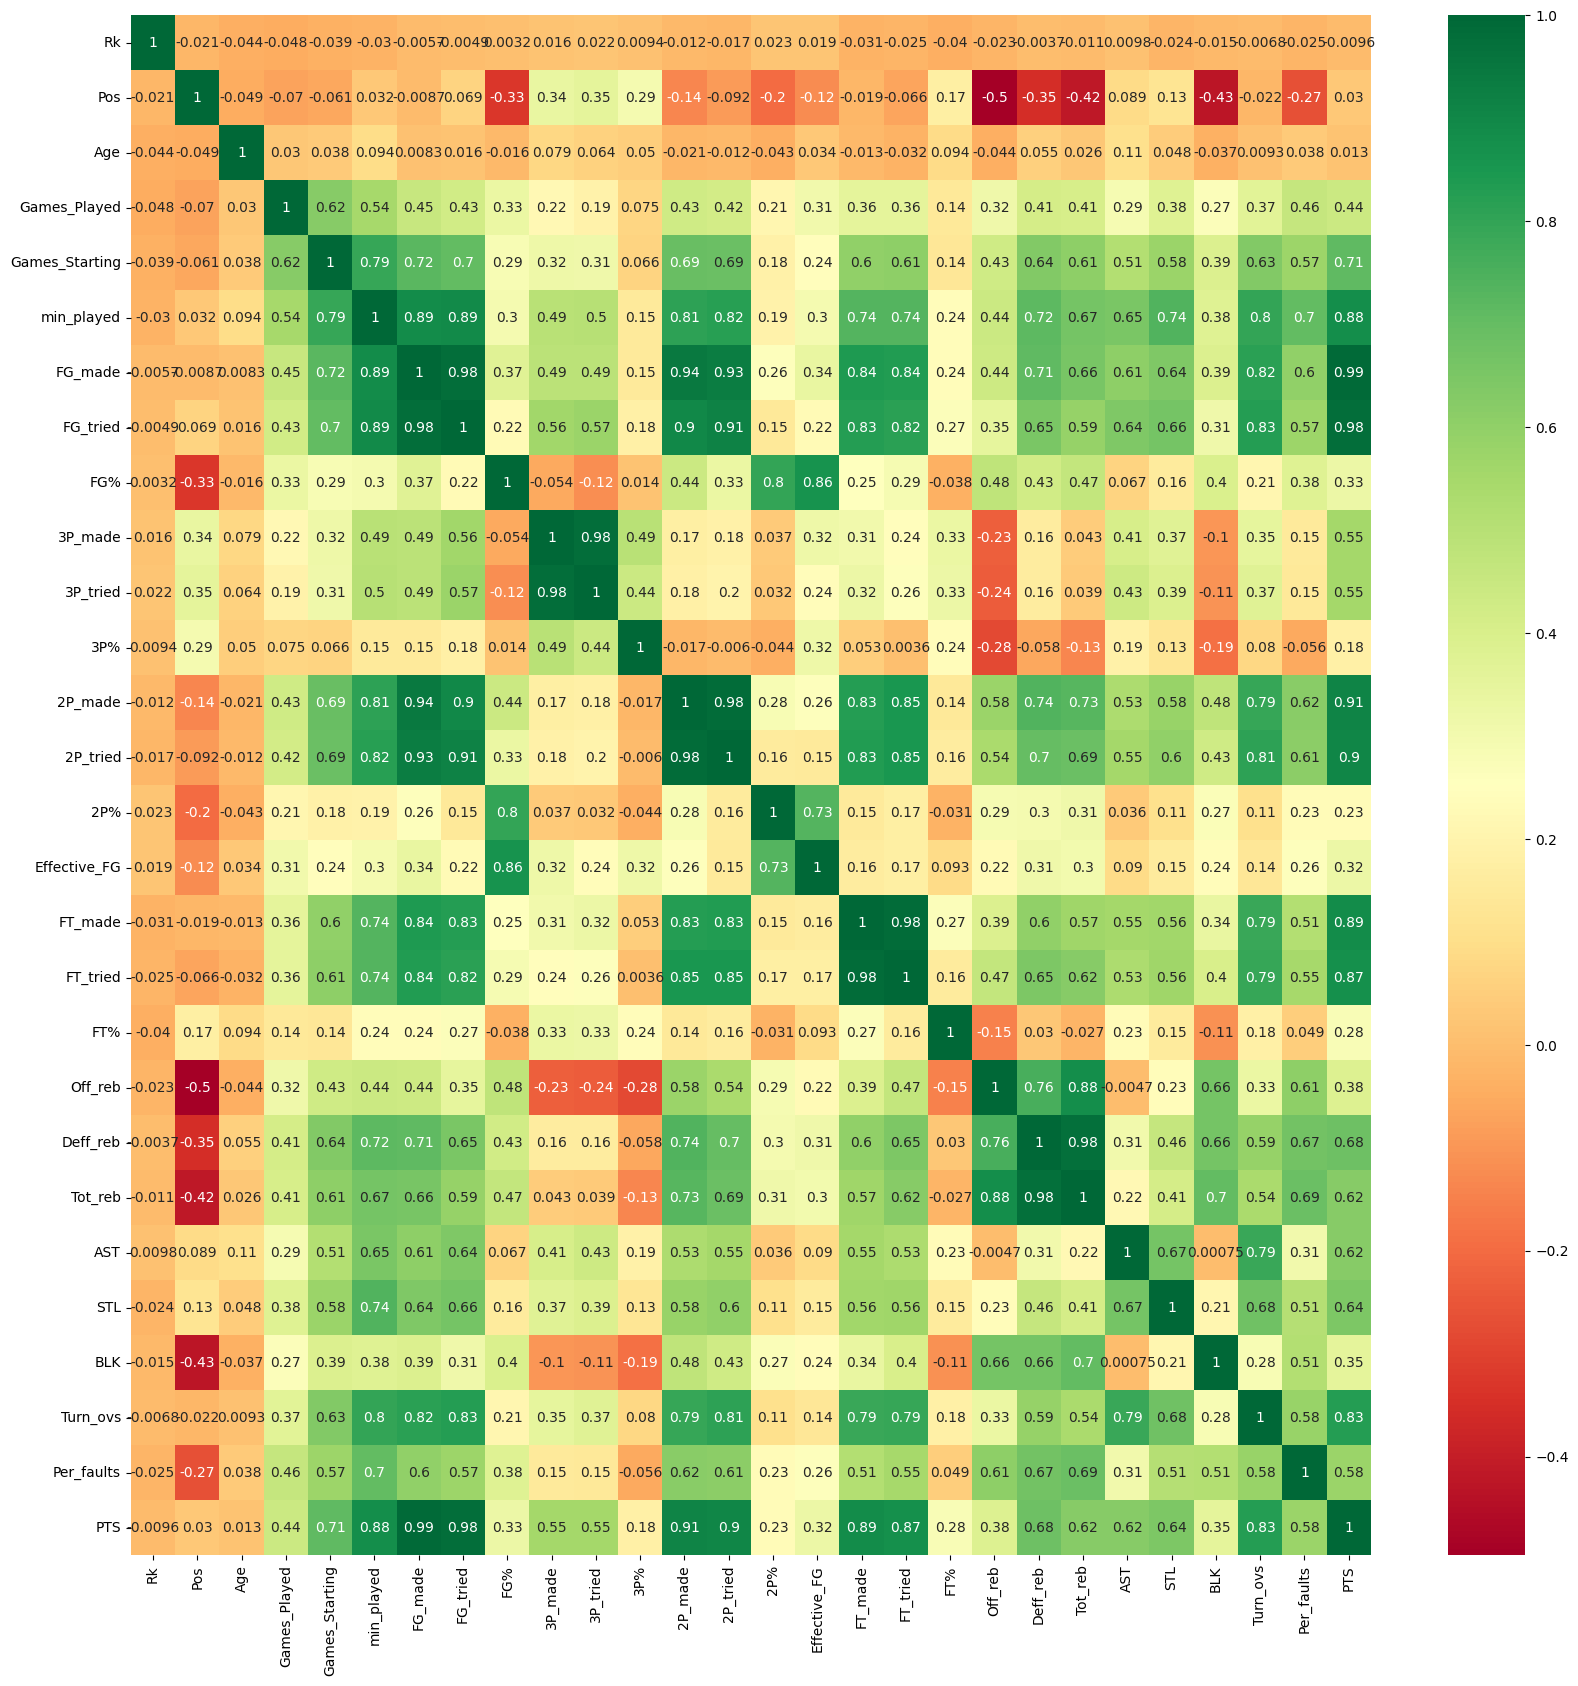

In [7]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Ahora, calculando particularmente la correlación de las demás variables con la variable objetivo y seleccionando las 5 con mayor  correlación, se obtiene que:

In [8]:
corr = df.corrwith(df['Pos'])

corr = corr.abs().sort_values(ascending=False)
top_vars = corr.index[1:6]

for var in top_vars:
    coef = corr[var]
    print(f"{var}: {coef:.2f}")


Off_reb: 0.50
BLK: 0.43
Tot_reb: 0.42
3P_tried: 0.35
Deff_reb: 0.35


Aquellas variables que tienen mayor correlación con la Posición de un jugador son:

'Off_reb', 'Tot_reb', 'BLK', '3P_tried', 'Deff_reb'

# Con todas las variables

Tomamos como variable objetivo la posición, mientras X será el conjunto de características y las demás stats de los jugadores. 

Adicionalmente, se normalizan las características del jugador para que estas tengan una media de cero y una desviación estándar de uno, con el fin de que todas ellas tengan el mismo rango y evitar que un atributo con valores des proporcionalmente grandes domine el modelo.

In [9]:
X = df.drop(columns=["Pos", "Player", "Team", "Year"], axis = 1)
y = df["Pos"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Árboles 

Los árboles de decisión son una herramienta poderosa y versátil en el aprendizaje automático debido a su interpretabilidad, eficiencia, capacidad para manejar diferentes tipos de datos y su capacidad para capturar relaciones complejas en los datos.

La siguiente función define la cantidad de hojas y la profundidad que maximizan el Score del árbol tanto para árboles de regresión, como para aquellos de clasificación.

In [10]:
def max_tree(tipo, X_train_scaled, y_train, X_test_scaled):
    ml = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]#max leafs
    md = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12] #max depth

    results = []
    for l in ml:
        for d in md:

            if tipo == 1:
                dtr = DecisionTreeClassifier( max_leaf_nodes=l, max_depth = d, random_state = 0)
                dtr.fit(X_train_scaled, y_train)
                y_pred = dtr.predict(X_test_scaled)
                score = dtr.score(X_train_scaled, y_train)
                results += [(score,l,d)]
                
            elif tipo == 0:
                dtr = DecisionTreeRegressor( max_leaf_nodes=l, max_depth = d, random_state = 0)
                dtr.fit(X_train_scaled, y_train)
                y_pred = dtr.predict(X_test_scaled)
                score = dtr.score(X_train_scaled, y_train)
                results += [(score,l,d)]

    print('Max Score: ', max(results)[0], ' leafs: ', max(results)[1], ' depth: ', max(results)[2])

    #Elbow plot
    dfg_leafs = pd.DataFrame({'Score': [r[0] for r in results], 'leafs': [r[1] for r in results]})
    dfg_depth = pd.DataFrame({'Score': [r[0] for r in results], 'depth': [r[2] for r in results]})
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    # Plot the first lineplot on the first subplot
    sns.lineplot(x='leafs', y='Score', data=dfg_leafs, color='b', ax=axs[0])
    axs[0].set_title('Score vs Leafs')

    # Plot the second lineplot on the second subplot
    sns.lineplot(x='depth', y='Score', data=dfg_depth, color='b', ax=axs[1])
    axs[1].set_title('Score vs Depth')

    # Show the plots
    plt.show()
    results = pd.DataFrame(results)
    results.columns = ['Score', 'Leafs', 'Depth']
    return results

Al ser este un problema de clasificación, resulta conveniente utilizar árboles de clasificación, ya que estos pueden manejar variables categóricas y predecir etiquetas de clase. No obstante, dado que es posible que existan posiciones intermedias o relaciones ordinales entre las posiciones tradicionales, se codifican las categorías con valores numéricos y se empleará DecisionTreeClassifier para capturar esas relaciones.

### Tree Regresor

A continuación definiremos tanto la profundidad, como la cantidad de hojas del árbol de decisión. 

Max Score:  0.41918842664935174  leafs:  12  depth:  12


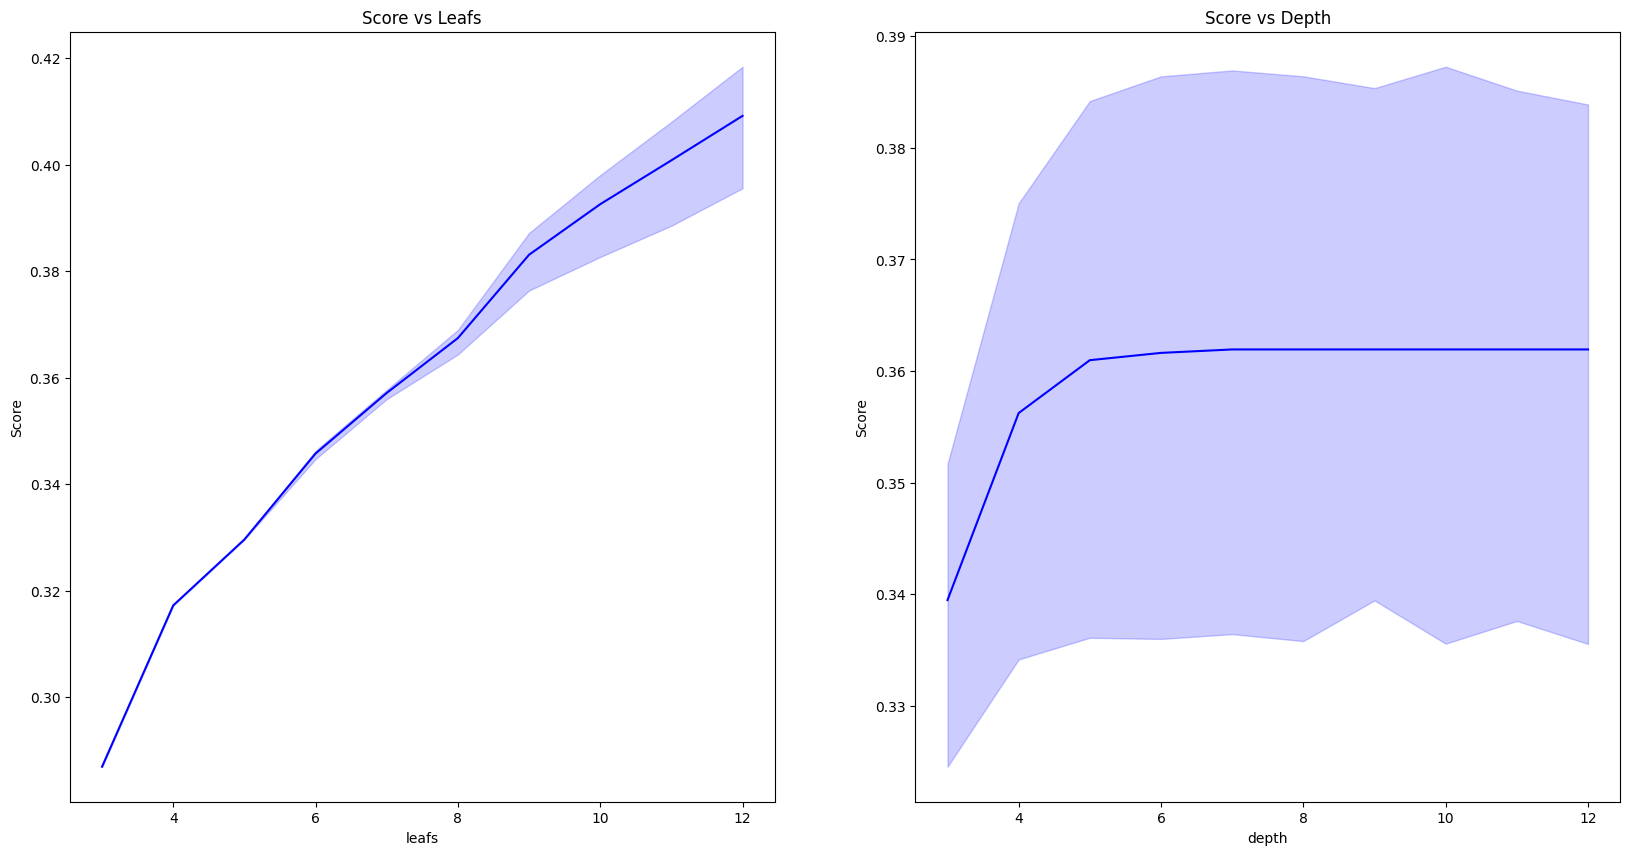

In [11]:
results = max_tree(0, X_train_scaled, y_train, X_test_scaled)

A pesar de que a medida que aumenta la profundidad y las hojas mejora el score, tomarémos depth = 5 y leafs = 9, ya que a partir de allí no hay una mejoría tan significativa.

In [12]:
results[(results['Leafs'] == 9) & (results['Depth'] == 5)]

Score  Leafs  Depth
62  0.387202      9      5

Con el óptimo de 12 hojas y profundidad 12, se tiene un score de 0.42. Tomando depth = 5 y leafs = 9, el score es menor, pues es de 0.39. No obstante, es bastante cercano al óptimo. 

In [13]:
dtr = DecisionTreeRegressor( max_leaf_nodes=9, max_depth=5, random_state = 0)
dtr.fit(X_train_scaled, y_train)
y_pred = dtr.predict(X_test_scaled)

score = dtr.score(X_test_scaled, y_test)
print("R2: ", score) 
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ",mse)

R2:  0.341481787821182
MAE:  0.9160406500154423
MSE:  1.2206269266979846


Este resultado muestra que el modelo de árbol de decisión explica aproximadamente el 34.15% de la varianza en la variable dependiente. Esto indica que las predicciones del modelo capturan una porción moderada de la variabilidad en los datos, pero aún queda una cantidad significativa de varianza no explicada.

Estos valores indican que el modelo tiene un MAE y un MSE moderadamente altos, lo que sugiere que las predicciones tienen cierto grado de error. Además, el R2 de 0.34 muestra que el modelo explica solo una fracción limitada de la variabilidad de los datos. Por lo tanto, es posible que se requieran mejoras o ajustes adicionales para mejorar la precisión y el rendimiento del modelo.

In [14]:
column_names = X.columns.tolist()

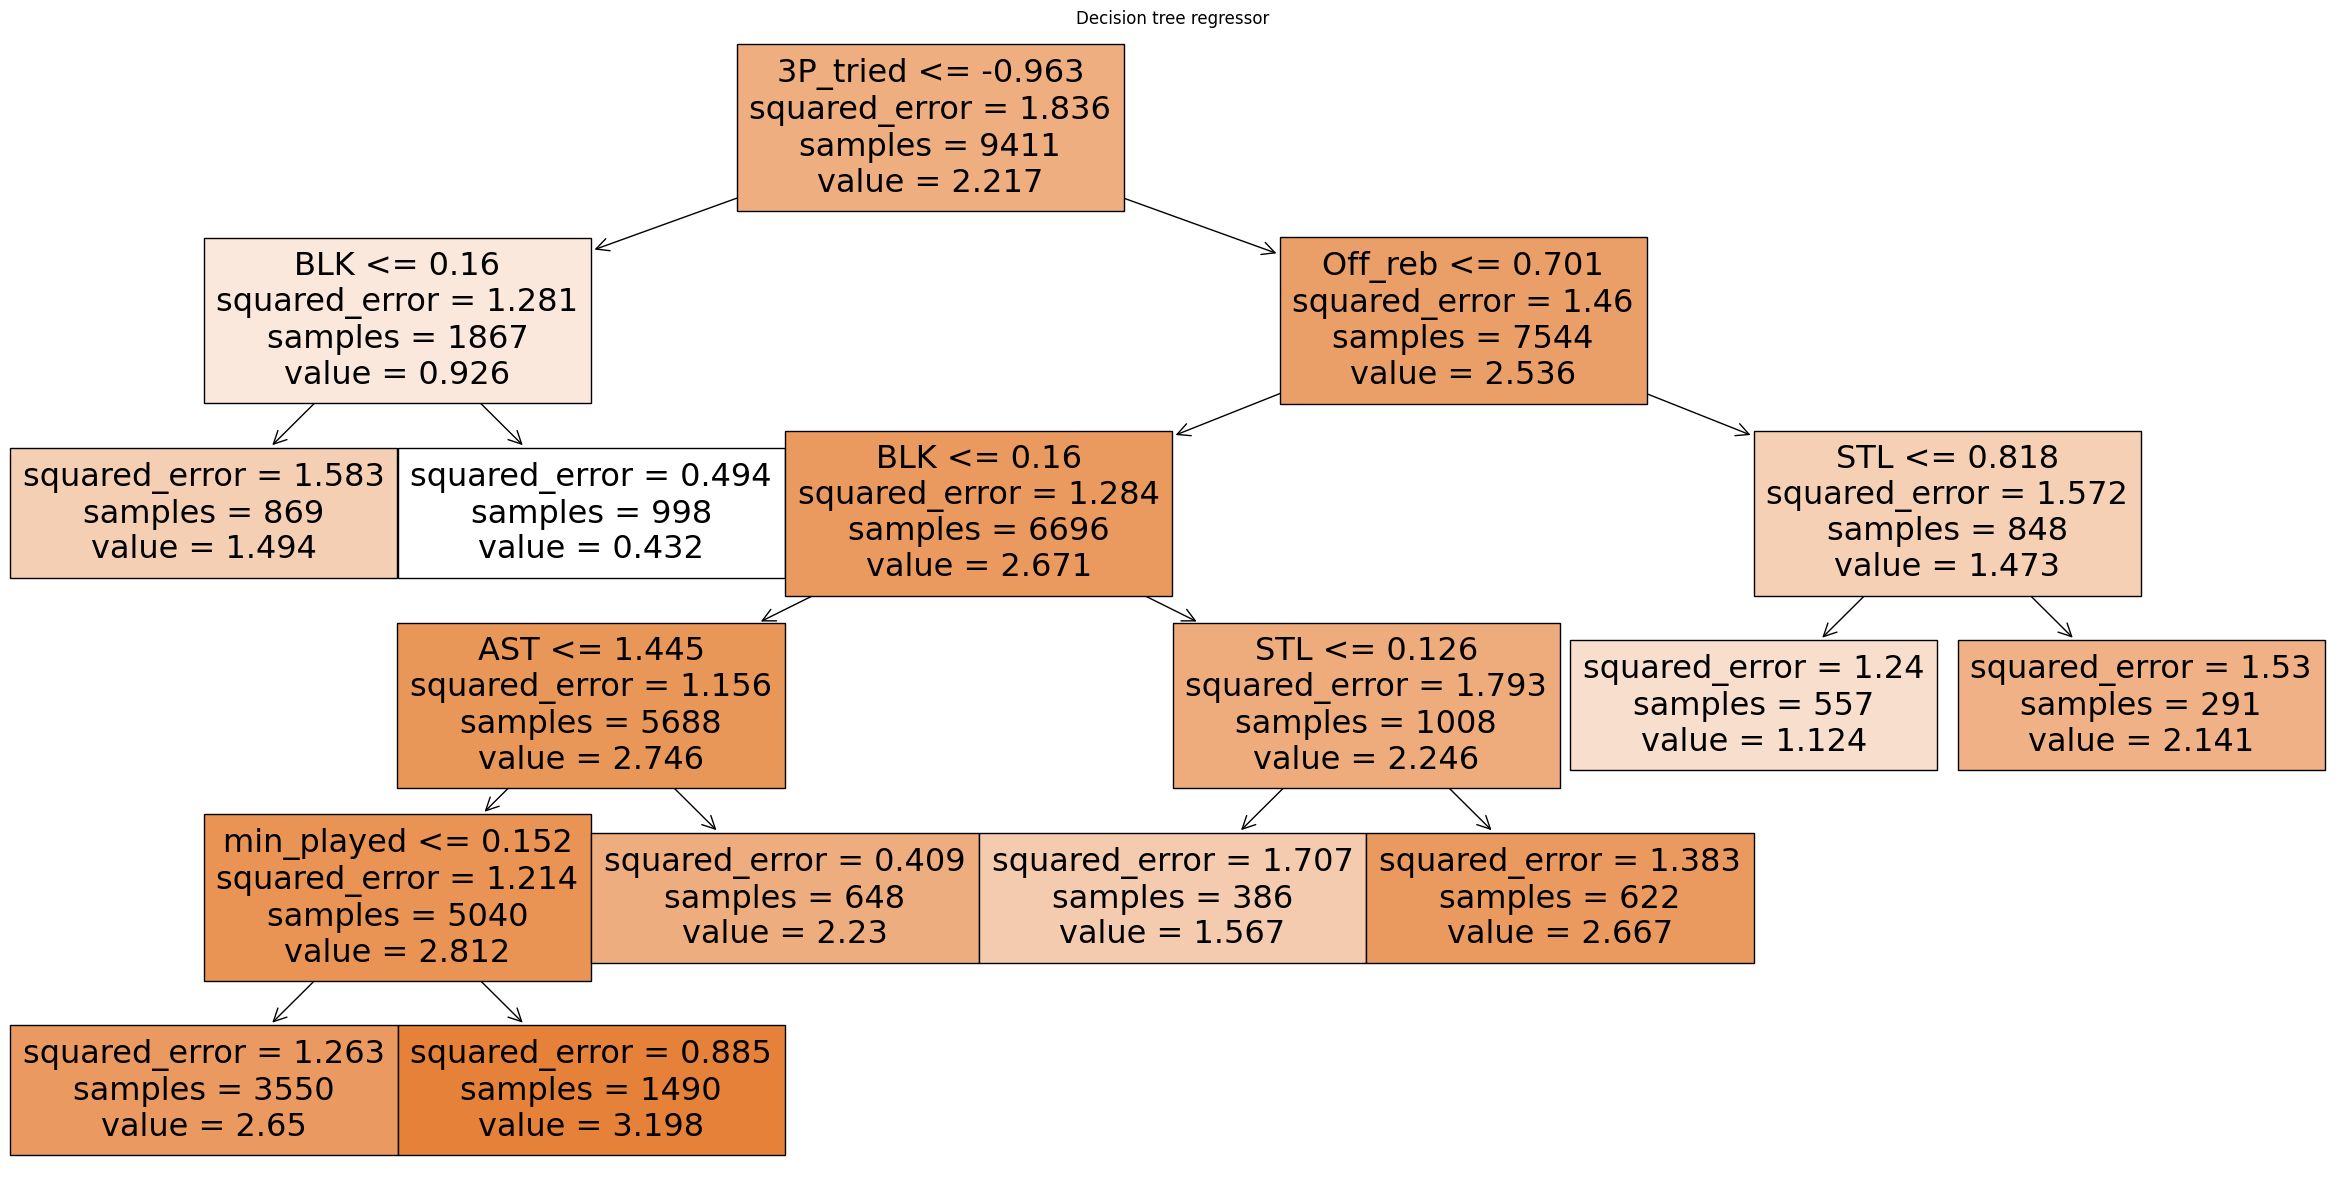

In [15]:
plt.figure(figsize=(30,15))
plot_tree(dtr, filled=True, class_names=True, feature_names = column_names)
plt.title("Decision tree regressor")
plt.show()

Aquí el primer criterio de división (nodo raíz) es si la característica 3P_tried toma un valor menor o igual a -0.963 (esto tras ser escalada). En dicho nodo hay 9411 muestras y un valor predicho de 2.217 (que coincide con la media del conjunto de entrenamiento), que corresponde a una posición intermedia entre SF y C, siendo SF la predominante. A partir de allí, las características que son Nodos son BLK, Off:_eb, STL y AST. 

Vemos que entre las posiciones resultantes predominan la SF y C.

### Classifier tree

Ahora, veamos las características que maximizan el Score de un árbol de clasificación con todas las características de juego de los deportistas.

Max Score:  0.531505684836893  leafs:  12  depth:  12


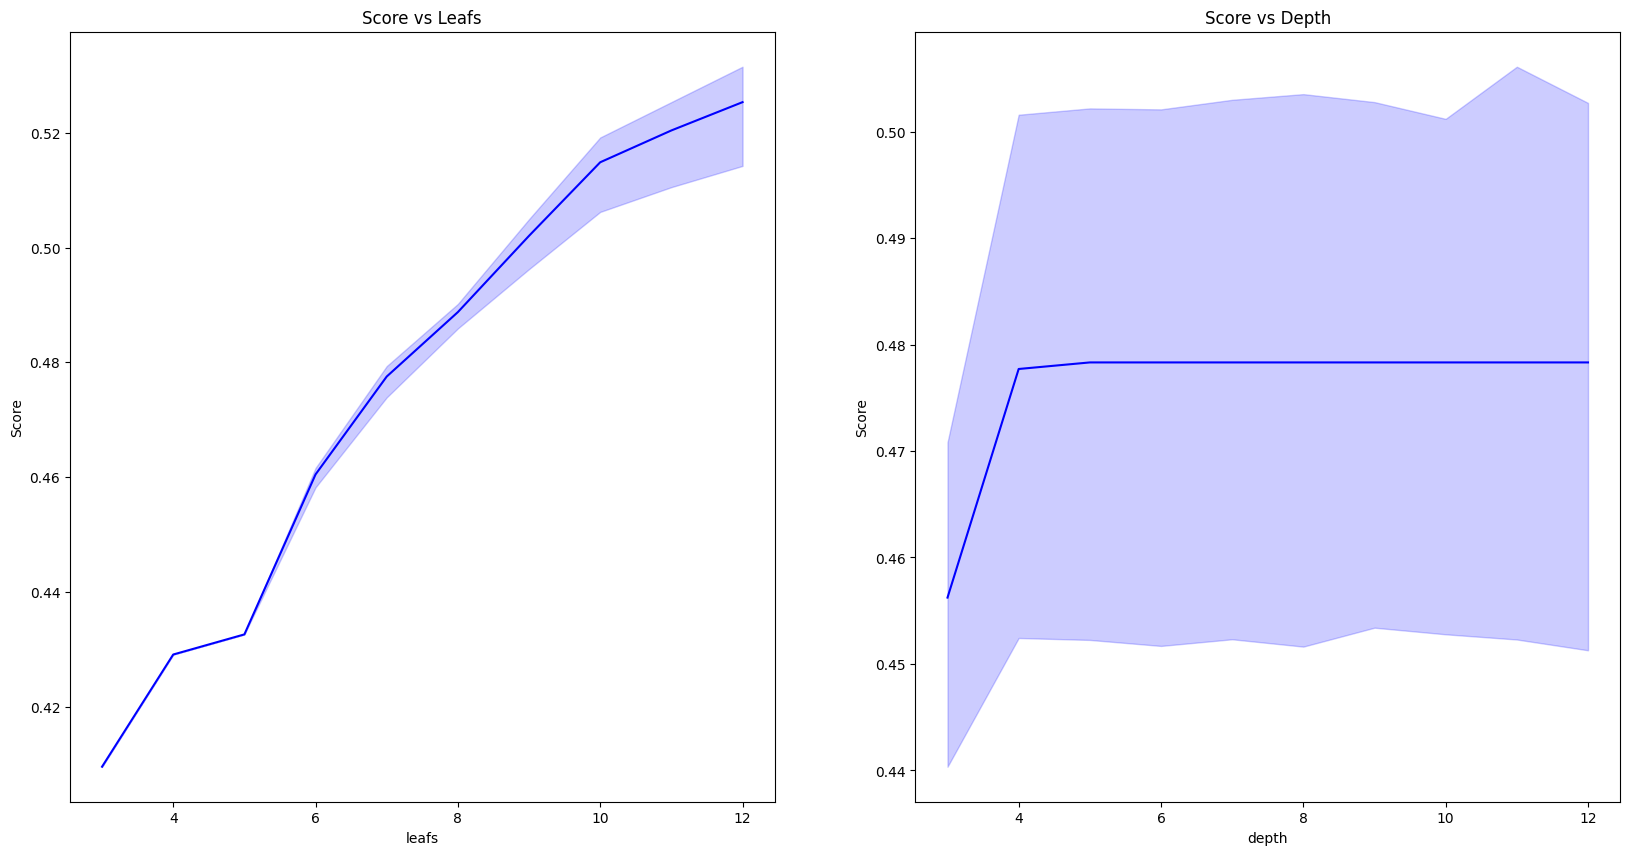

In [16]:
results = max_tree(1, X_train_scaled, y_train, X_test_scaled)

En este caso nos limitaremos a una profundidad de 4 y a 10 hojas. Esto, ya que considerar más podría implicar un sobre ajuste del modelo, de forma que este no permita que se haga una generalización de un patrón, sino más bien un enfoque en características más puntuales. 

In [17]:
results[(results['Leafs'] == 10) & (results['Depth'] == 4)]

Score  Leafs  Depth
71  0.51918     10      4

El Score óptimo es de 0.53, mientras que el Score para depth = 4 y leafs = 10 es de 0.52, por lo que se mantiene el coeficiente de determinación incluso cuando limitamos el problema.

In [18]:
clf = DecisionTreeClassifier(random_state=0, max_leaf_nodes=10, max_depth = 4, criterion='entropy')
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       random_state=0)

In [19]:
y_pred = clf.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47513812154696133


En este caso la accuracy es de 47.51%, lo cual, como era de esperarse, representa una mejoría respecto a aquella del árbol de regresión. 

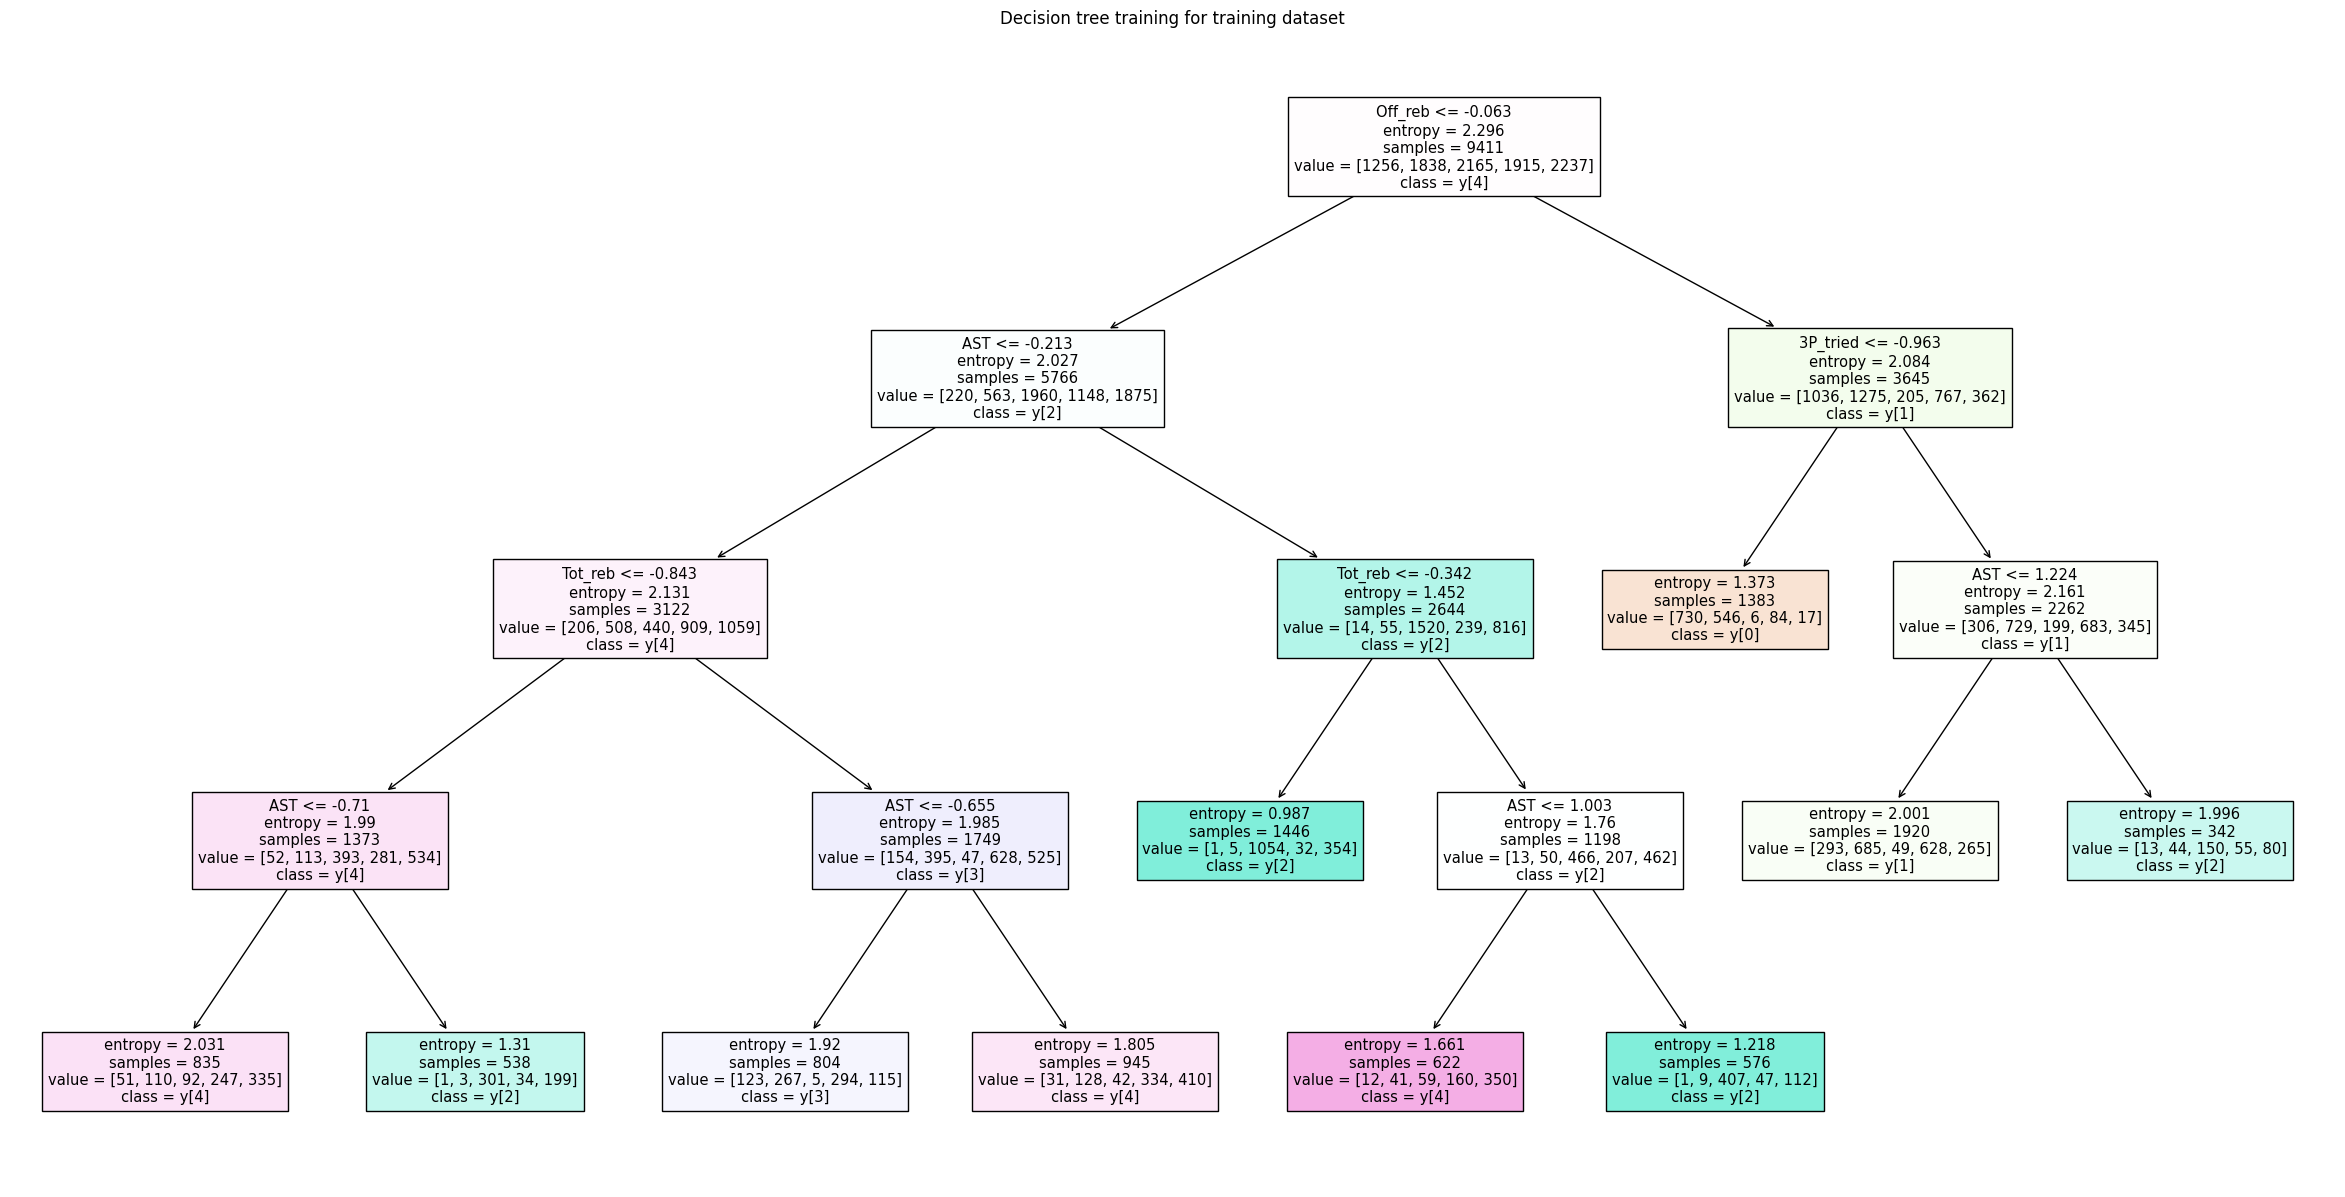

In [20]:
plt.figure(figsize=(30,15))
plot_tree(clf, filled=True, class_names=True, feature_names = column_names)
plt.title("Decision tree training for training dataset")
plt.show()

Vemos que inicialmente la entropía es de 2.3, lo cual indica el nivel inicial de impureza o incertidumbre en la distribución de la variable objetivo en el nodo raíz. Esto significa que la distribución de las posiciones de los jugadores dentro del nodo inicial no está muy sesgada hacia una posición específica, sino que muestra cierto nivel de variabilidad.

A medida que el algoritmo del árbol de decisión avanza y divide los datos en función de diferentes características, su objetivo es minimizar la entropía en cada paso y crear subgrupos de datos más puros con respecto a la variable objetivo, no obstante, en este caso no se acerca a 0, por lo cual el modelo no es muy adecuado para la clasificación de los jugadores en 5 posiciones dentro de la cancha.

## PCA

El hacer uso del método Principal Component Analysis puede ayudar a reducir la dimensionalidad de los datos, lo cual resulta útil cuando se trabaja con conjuntos de características grandes. Al reducir la dimensionalidad, PCA puede eliminar características redundantes y ruido, lo que facilita el procesamiento y mejora la eficiencia computacional. Además, PCA puede ayudar a identificar las direcciones principales de variabilidad en los datos, lo que puede ser útil para descubrir patrones y estructuras subyacentes. Esto puede mejorar el rendimiento del árbol clasificador al proporcionar una representación más compacta y significativa de los datos, lo que a su vez puede facilitar la toma de decisiones y la generalización en la etapa de clasificación

In [21]:
pca = PCA(n_components=3)
X_pca = pca.fit(X_train_scaled)
X_train_pca = X_pca.transform(X_train_scaled)
X_test_pca = X_pca.transform(X_test_scaled)
X_train_pca_df = pd.DataFrame(data = X_train_pca, columns = ["PC1", "PC2", "PC3"])
X_test_pca_df = pd.DataFrame(data = X_test_pca, columns = ["PC1", "PC2", "PC3"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


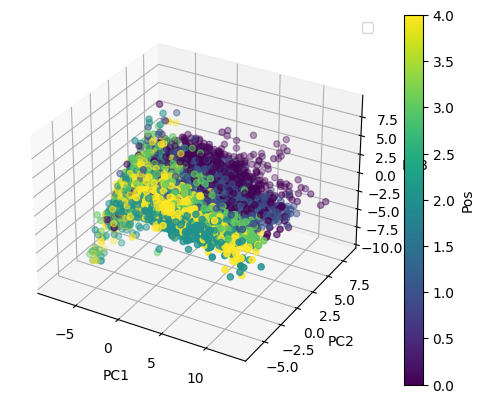

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color map for target variable
cmap = plt.cm.get_cmap('viridis')

# Plot the transformed training data
sc = ax.scatter(X_train_pca_df['PC1'], X_train_pca_df['PC2'], X_train_pca_df['PC3'], c=y_train, cmap=cmap)

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Pos')

# Plot the transformed test data (if available)
if 'X_test_pca_df' in globals():
    ax.scatter(X_test_pca_df['PC1'], X_test_pca_df['PC2'], X_test_pca_df['PC3'], c=y_test, cmap=cmap)

# Set labels and legend
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

# Show the plot
plt.show()

### Classifier Tree

Max Score:  0.43523536287323344  leafs:  12  depth:  4


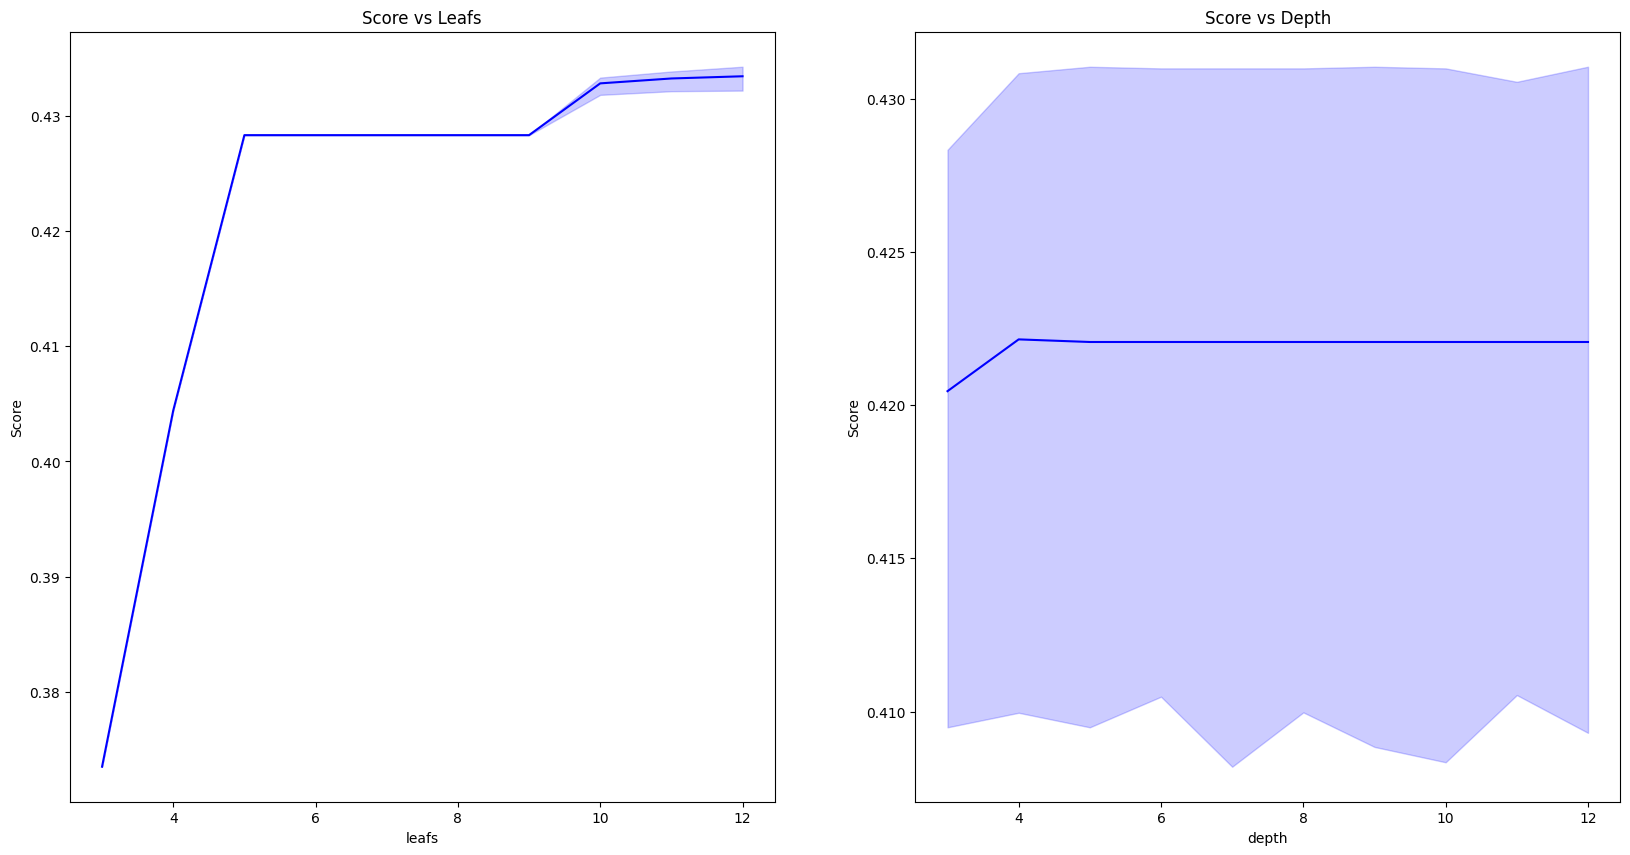

In [23]:
results = max_tree(1, X_train_pca, y_train, X_test_pca)

Una vez más, nos limitamos a tomar 10 nodos y una profundidad máxima de 4.

In [24]:
clf = DecisionTreeClassifier(random_state=0, max_leaf_nodes=10, max_depth = 4, criterion='entropy')
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("Classification Report: \n",metrics.classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.60      0.61       336
           1       0.38      0.29      0.33       462
           2       0.42      0.67      0.52       530
           3       0.32      0.30      0.31       489
           4       0.42      0.29      0.34       536

    accuracy                           0.42      2353
   macro avg       0.43      0.43      0.42      2353
weighted avg       0.42      0.42      0.41      2353



Vemos que incluso tras hacer PCA la accuracy sigue sin ser muy alta. En este caso particular, el hacer el árbol tras reducir la dimensionalidad resulta en una menor accuracy que cuando se realiza directamente el árbol de clasificación, de forma que hacer PCA antes de un árbol clasificador no siempre implica mejoras. 

Aunque PCA puede reducir o eliminar la redundancia y el ruido en los datos, ya que PCA reduce la dimensionalidad al proyectar los datos en un espacio de menor dimensión puede que se pierda parte de la información original. En algunos casos, esta pérdida de información puede ser significativa y afectar negativamente el rendimiento del clasificador.

## KNN

In [25]:
scores = []
for i in range(2, 20):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train_scaled, y_train.values.ravel())
  scores.append((knn.score(X_test_scaled, y_test), i))

In [26]:
print(max(scores, key=lambda x:x[0]))

(0.5204773635424702, 13)


Esto sugiere que el modelo KNN con K=13 vecinos más cercanos al punto de datos no etiquetado, logró el puntaje más alto de entre los evaluados según la métrica utilizada.

## SVM

Se ha elegido utilizar SVM (Support Vector Machines) en el problema de clasificación de la posición de jugadores de la NBA por varias razones. En primer lugar, SVM es conocido por su capacidad para manejar conjuntos de datos de alta dimensionalidad, lo cual es relevante considerando la gran cantidad de variables y atributos que se pueden asociar con los jugadores de baloncesto. Además, SVM es capaz de encontrar hiperplanos óptimos que separan claramente las diferentes posiciones de los jugadores, lo que ayuda a identificar patrones y características distintivas para cada posición. Asimismo, SVM puede manejar eficientemente problemas de clasificación no lineales, lo que es beneficioso para capturar la complejidad y las interacciones no lineales presentes en los datos de los jugadores de baloncesto.

In [27]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

y_pred = clf_svm.predict(X_test_scaled)

report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       336
           1       0.59      0.61      0.60       462
           2       0.83      0.84      0.83       530
           3       0.56      0.50      0.53       489
           4       0.58      0.65      0.61       536

    accuracy                           0.65      2353
   macro avg       0.66      0.65      0.65      2353
weighted avg       0.66      0.65      0.65      2353



Aunque considera todas las variables, la accuracy (65%) es significativamente mayor que aquella de los árboles de decisión. En general, el clasificador muestra una precisión moderada, con valores que oscilan entre 0.56 y 0.83 para las diferentes clases.

El F1-score es una medida que combina la precisión y el recall en una sola métrica, proporcionando una medida ponderada de la precisión general del clasificador. Los valores de F1-score oscilan entre 0.53 y 0.83, indicando un rendimiento moderado del clasificador en la mayoría de las clases.

En general, el clasificador SVM muestra un rendimiento moderado en la clasificación de las diferentes clases, con valores de precisión, recall y F1-score que varían en función de la clase específica. Se puede observar que algunas clases tienen un rendimiento mejor que otras, lo que puede indicar desequilibrios en los datos. 

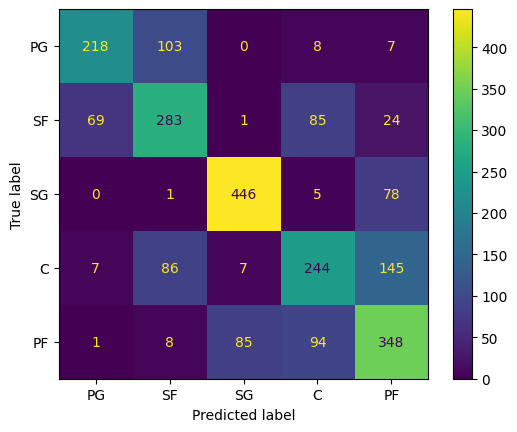

In [28]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                     display_labels=['PG','SF','SG','C','PF'])

La categoría 'PG' (Point Guard) tiene 218 instancias que fueron clasificadas correctamente como 'PG', 103 instancias fueron incorrectamente clasificadas como 'SF' (Small Forward), ninguna instancia como 'SG' (Shooting Guard), 8 instancias como 'C' (Center) y 7 instancias como 'PF' (Power Forward).

- La categoría 'SF' (Small Forward) cuenta con 69 instancias clasificadas correctamente como 'SF', 283 instancias fueron incorrectamente clasificadas como 'PG', 1 instancia como 'SG', 85 instancias como 'C' y 24 instancias como 'PF'.

- La categoría 'SG' (Shooting Guard) no tiene ninguna instancia clasificada como 'PG', 1 instancia fue clasificada correctamente como 'SG', 446 instancias fueron incorrectamente clasificadas como 'PF', 5 instancias como 'C' y 78 instancias como 'PF'.

- La categoría 'C' (Center) cuenta con 7 instancias clasificadas correctamente como 'C', 86 instancias incorrectamente clasificadas como 'PG', 7 instancias como 'SG', 244 instancias como 'C' y 145 instancias como 'PF'.

- La categoría 'PF' (Power Forward) tiene 1 instancia clasificada correctamente como 'PF', 8 instancias fueron incorrectamente clasificadas como 'PG', 85 instancias como 'SG', 94 instancias como 'C' y 348 instancias como 'PF'.

Vemos que la posición que es más precisamente predicha es SF. 

## Redes Neuronales

Ahora vamos a ver como un modelo de red neuronal con todas las variables se comporta. Nuestra variable objetivo son las 5 diferentes posiciones: C, PF, PG, SF, SG. Para el training utilizaremos 60% de los datos, mientras que para testing y validation utilizaremos 20% en cada una.

In [29]:
dfNN=pd.read_csv('NBA_Player_Stats_new.csv').dropna()
posit = ['PG','SG','SF','C','PF']
dfNN = dfNN[dfNN['Pos'].isin(posit)]
dfNN = pd.get_dummies(dfNN,columns=['Pos'])

In [30]:
Xnn = dfNN.drop(columns=['Pos_C','Pos_PF','Pos_PG','Pos_SF','Pos_SG', "Player", "Team", "Year"], axis = 1)
ynn = dfNN[['Pos_C','Pos_PF','Pos_PG','Pos_SF','Pos_SG']]
Xnn_train, X_test1, ynn_train, y_test1 = train_test_split(Xnn, ynn, train_size = 0.6, test_size = 0.4)
Xnn_val, Xnn_test, ynn_val, ynn_test = train_test_split(X_test1, y_test1, train_size = 0.2, test_size = 0.2)

Además, vamos a estandarizar nuestras variables:

In [31]:
scaler = StandardScaler()
Xscaler = scaler.fit(Xnn_train)
Xtrain_scaled = Xscaler.transform(Xnn_train)
Xtest_scaled = Xscaler.transform(Xnn_test)
Xval_scaled = Xscaler.transform(Xnn_val)

Xtrain_scaled  = pd.DataFrame(Xtrain_scaled)
Xtest_scaled  = pd.DataFrame(Xtest_scaled)
Xval_scaled  = pd.DataFrame(Xval_scaled)

In [32]:
class MyDataset():
 
  def __init__(self,X,y):
    X = X.values
    y = y.values
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y)
   
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

Ahora usamos los Dataloaders para los conjuntos train, val y test.

In [33]:
train_sec=MyDataset(Xtrain_scaled, ynn_train)
test_sec=MyDataset(Xtest_scaled, ynn_test)
val_sec=MyDataset(Xval_scaled, ynn_val)

In [34]:
traindata=DataLoader(
    train_sec,
    batch_size=5,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

testdata=DataLoader(
    test_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

valdata=DataLoader(
    val_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

Visualzamos nuestros diferentes conjuntos de datos:

In [35]:
for i, (data, labels) in enumerate(testdata):
  print(data.shape, labels.shape)
  print(data,labels)
  break;

torch.Size([3, 27]) torch.Size([3, 5])
tensor([[-1.1418,  0.5309, -1.0768, -0.8828, -0.6745, -0.6033, -0.5794, -0.3777,
         -0.2862, -0.2825,  0.5478, -0.6250, -0.5280, -0.5692, -0.2501,  0.0944,
         -0.0346,  0.7962, -0.7731, -1.0227, -0.9560,  0.1971, -0.6868, -0.8780,
          0.1975, -0.7228, -0.4688],
        [-1.2986, -1.5843,  1.1510, -0.1649, -0.4520, -0.3695, -0.4468,  0.2823,
         -0.1474, -0.1759,  0.3565, -0.3611, -0.4485,  0.4329,  0.3645, -0.3351,
         -0.2630, -0.4389, -0.3885, -0.2768, -0.3279, -0.6767, -0.6868, -0.4190,
         -0.4306, -0.0720, -0.3836],
        [ 0.1833,  1.9411,  1.2747,  2.0246,  1.8892,  1.4541,  1.5639,  0.0937,
          1.9342,  1.9561,  0.5159,  0.9055,  0.9026,  0.2026,  0.4168,  1.7405,
          1.2789,  1.3692, -0.5167,  0.1822, -0.0348,  0.6339,  0.6954, -0.4190,
          0.4487,  0.1883,  1.7116]]) tensor([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


Podemos ver que vamos a utilizar 27 variables para definir una red que llega a 5 variables catecoricas de posición.

### Definición de red neuronal

Para esta red utilizamos 3 capas, dos ocultas. En este caso escogemos la función de activación sigmoid ya que nuestro output queremos que este entre 0 y 1.

In [36]:
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(27,17)
        self.fc2 = nn.Linear(17,10)
        self.fc3 = nn.Linear(10,5)
        

    def forward(self, x):   
    	# Do the forward pass
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [37]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


Definimos el modelo, el optimizadoy y la función de costo.

In [38]:
model = Net()
optimizer= torch.optim.SGD(model.parameters(),lr= 0.1)
criterion= nn.CrossEntropyLoss()
model.to(device)

Net(
  (fc1): Linear(in_features=27, out_features=17, bias=True)
  (fc2): Linear(in_features=17, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
)

### Entrenando la red y guardando el mejor modelo
A continuación definimos la función de entrenamiento

In [39]:
def train_model(model,optimizer,loss_module,train_loader,valid_loader,num_epochs):
  
  valid_loss_min =np.inf 
  
  for i in range(num_epochs):
    model.train()
    train_loss = 0.0
    v_loss = 0.0

    for data, target in train_loader:
        # mover los tensores de atributos y etiquetas al dispositivo GPU
        data_inputs = data.to(device)
        data_labels = target.to(device)

        # Reiniciar los gradientes
        optimizer.zero_grad()

        # forward pass: calcular la salida para los datos de entrada..
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1)

        # calculate the batch loss
        loss = loss_module(preds, data_labels)
        
        # backpropagation: cálculo de gradientes
        loss.backward()
   
        # actualizar los parámetros
        optimizer.step()

        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.dataset) 

    model.eval() 

    for data,target in valid_loader:
        data=data.to(device)
        target=target.to(device)
        output=model(data)
        valid_loss= criterion(output, target)
        valid_loss += valid_loss.item()*data.size(0) 
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        i, train_loss, valid_loss))

    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'NBA.pt')
        valid_loss_min = valid_loss

In [40]:
train_model(model,optimizer,criterion,traindata,valdata,10)

Epoch: 0 	Training Loss: 1.333905 	Validation Loss: 0.003062
Validation loss decreased (inf --> 0.003062).  Saving model ...
Epoch: 1 	Training Loss: 0.962330 	Validation Loss: 0.002776
Validation loss decreased (0.003062 --> 0.002776).  Saving model ...
Epoch: 2 	Training Loss: 0.886569 	Validation Loss: 0.002408
Validation loss decreased (0.002776 --> 0.002408).  Saving model ...
Epoch: 3 	Training Loss: 0.852791 	Validation Loss: 0.002195
Validation loss decreased (0.002408 --> 0.002195).  Saving model ...
Epoch: 4 	Training Loss: 0.834565 	Validation Loss: 0.002133
Validation loss decreased (0.002195 --> 0.002133).  Saving model ...
Epoch: 5 	Training Loss: 0.822898 	Validation Loss: 0.002113
Validation loss decreased (0.002133 --> 0.002113).  Saving model ...
Epoch: 6 	Training Loss: 0.814529 	Validation Loss: 0.002117
Epoch: 7 	Training Loss: 0.808352 	Validation Loss: 0.002129
Epoch: 8 	Training Loss: 0.803334 	Validation Loss: 0.002140
Epoch: 9 	Training Loss: 0.798944 	Validat

In [41]:
model.load_state_dict(torch.load('NBA.pt'))

<All keys matched successfully>

Nuestro modelo se ve de la siguiente manera:

In [42]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

fc1.weight tensor([[-1.2193e-01,  3.0608e-01,  1.1064e-01,  7.4839e-02,  4.9400e-01,
         -1.4006e-01, -8.5606e-02, -3.3191e-01, -2.6855e-01, -2.5155e-01,
          1.8929e-01,  6.0494e-02,  1.2087e-01,  1.7729e-01,  2.4891e-01,
          1.2439e-01,  5.2227e-02, -1.8535e-01,  3.4148e-01,  6.0384e-01,
          8.3022e-01, -1.5755e+00, -3.6130e-02,  6.3140e-01, -1.2013e-03,
         -1.5378e-01, -1.6188e-01],
        [-4.1255e-02,  1.2958e-01,  2.2207e-01,  8.0777e-02,  2.1104e+00,
         -1.2059e-01,  9.4775e-02, -1.3427e-02, -5.6568e-01,  1.8545e-01,
          8.7394e-02, -9.4125e-02,  1.0923e-01,  3.1396e-01, -4.4609e-02,
          1.4611e-01, -1.3111e-01, -3.1814e-01, -6.3502e-01, -1.0870e+00,
         -1.0600e+00,  1.2393e+00,  1.2142e+00, -4.6971e-01,  6.1441e-01,
         -5.4025e-01, -1.2395e-01],
        [-1.4207e-02, -4.4951e-01,  7.1229e-02, -2.0634e-01,  1.4752e+00,
         -3.1506e-02,  2.5105e-01, -2.5778e-01,  9.7653e-02,  3.0899e-01,
          5.0033e-03, -6.6050

### Evaluación del modelo

In [43]:
test_loss=0.0

criterion= nn.CrossEntropyLoss()
for data, target in testdata:
  data=data.to(device)
  target=target.to(device)
  output=model(data)
  loss= criterion(output,target)
  test_loss += loss.item()*data.size(0)
test_loss = test_loss/len(testdata.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

Test Loss: 0.838221



In [44]:
accuracy=0.0

for data, target in testdata:
    data=data.to(device)
    target=target.to(device)
    output=model(data).detach().numpy()
    target = np.nanargmax(target.detach().numpy(), axis=1)
    output = np.nanargmax(output, axis = 1)
    a = accuracy_score(target,output)
    accuracy += a.item()*data.size(0)
accuracy = accuracy/len(testdata.dataset)
print('Accuracy: {:.6f}\n'.format(accuracy))

Accuracy: 0.636943



Como podemos ver, el accuracy de este modelo más alto de lo esperado pero el test loss es significaténivamesnte alto también. Esto indica que el modelo, aunque clasifica bien para los datos de test, la diferencia entre validation loss y test loss es alta y estamos desvalorizando algunas de las variables.Se hicieron multiples pruebas para el data set; con más o menos capas, capas con más nodos y menos nodos, con diferentes funciones de activación. Sin embargo, no se logró aumentar el accuracy de la red neuronal por encima del 0.63. Por lo tanto, vamos a tratar de hacer el modelo únicamente con las variable de mayor correlación o reduciendo las cantidad de variables categóricas.

# Solo con las de mayor correlación

En este caso, se consideran únicamente las variables que tienen una mayor correlación con la Posición del jugador 

In [45]:
X_c = df[top_vars]
y = df["Pos"]

Nuevamente, se separan y se escalan los datos

In [46]:
X_c_train, X_c_test, y_train, y_test = train_test_split(X_c, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_c_scaler = scaler.fit(X_c_train)
X_c_train_scaled = X_c_scaler.transform(X_c_train)
X_c_test_scaled = X_c_scaler.transform(X_c_test)

## Árboles 

### Tree Regressor

Max Score:  0.37434211679599516  leafs:  12  depth:  12


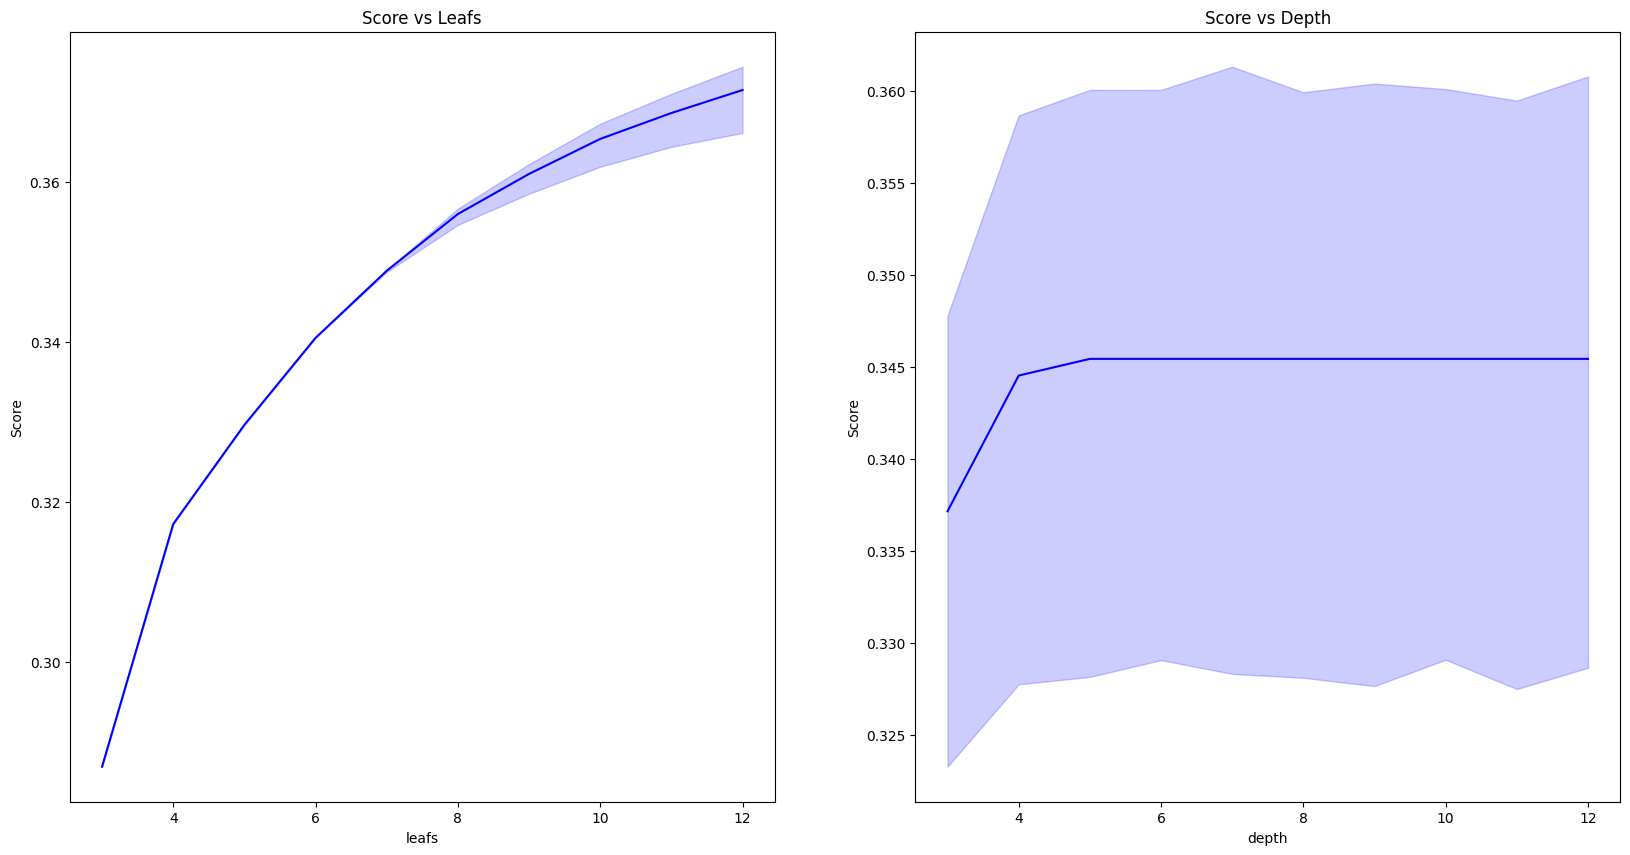

In [47]:
results = max_tree(0, X_c_train_scaled, y_train, X_c_test_scaled)

Al igual que en el caso anterior, tomaremos depth = 5 y leafs = 10, ya que a partir de allí no hay una mejoría tan significativa.

In [48]:
results[(results['Leafs'] == 10) & (results['Depth'] == 5)]

Score  Leafs  Depth
72  0.36723     10      5

La diferencia entre los Scores es de 0.007.

Ahora, evaluando con el conjunto de test se tiene que:

In [49]:
dtr = DecisionTreeRegressor( max_leaf_nodes=10, max_depth=5, random_state = 0)
dtr.fit(X_c_train_scaled, y_train)
y_pred = dtr.predict(X_c_test_scaled)

score = dtr.score(X_c_test_scaled, y_test)
print("R2: ", score) 
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ",mse)

R2:  0.34259376639770245
MAE:  0.9291112537446685
MSE:  1.2185657673142198


En este caso la variabilidad explicada por el modelo es ligeramente más alta que en el primer caso. No obstante, la mejora es no significativa.

In [50]:
column_names_c = X_c.columns.tolist()


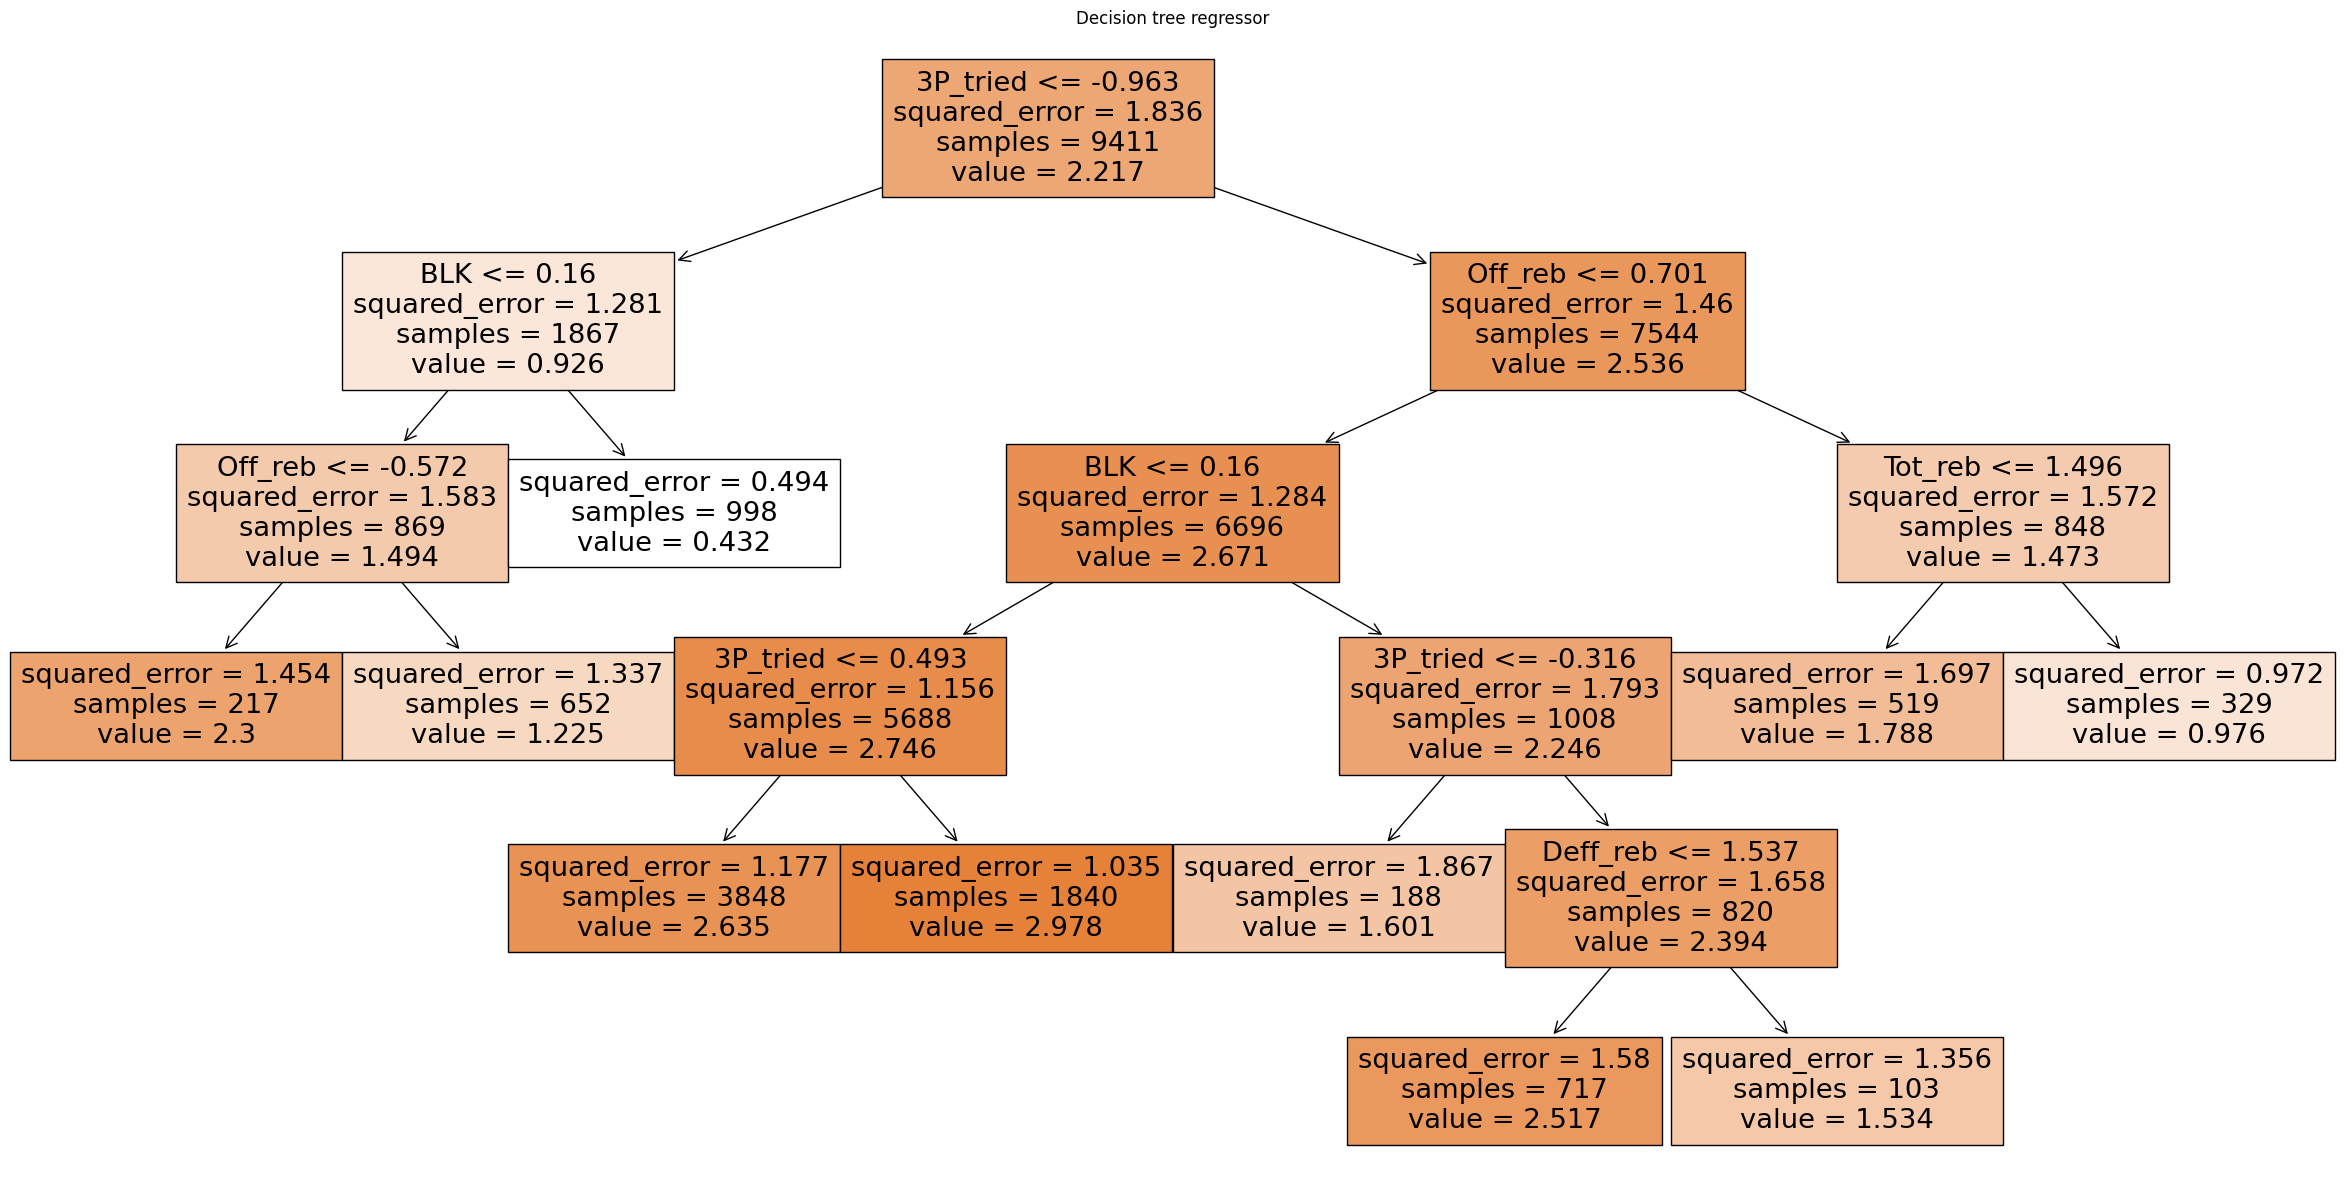

In [51]:
plt.figure(figsize=(30,15))
plot_tree(dtr, filled=True, class_names=True, feature_names = column_names_c)
plt.title("Decision tree regressor")
plt.show()

Al igual que en el caso con todas las variables, el primer criterio de división (nodo raíz) es si la característica 3P_tried toma un valor menor o igual a -0.963.  A partir de allí, las características que son Nodos son BLK, Off_reb, Tot_reb y Deff_reb. Vemos que algunas de estas variables coinciden con las del árbol inicial y los nodos de las primeras 2 capas son virtualmente idénticos a los de este. 

### Classifier tree

Max Score:  0.4377855700775688  leafs:  12  depth:  12


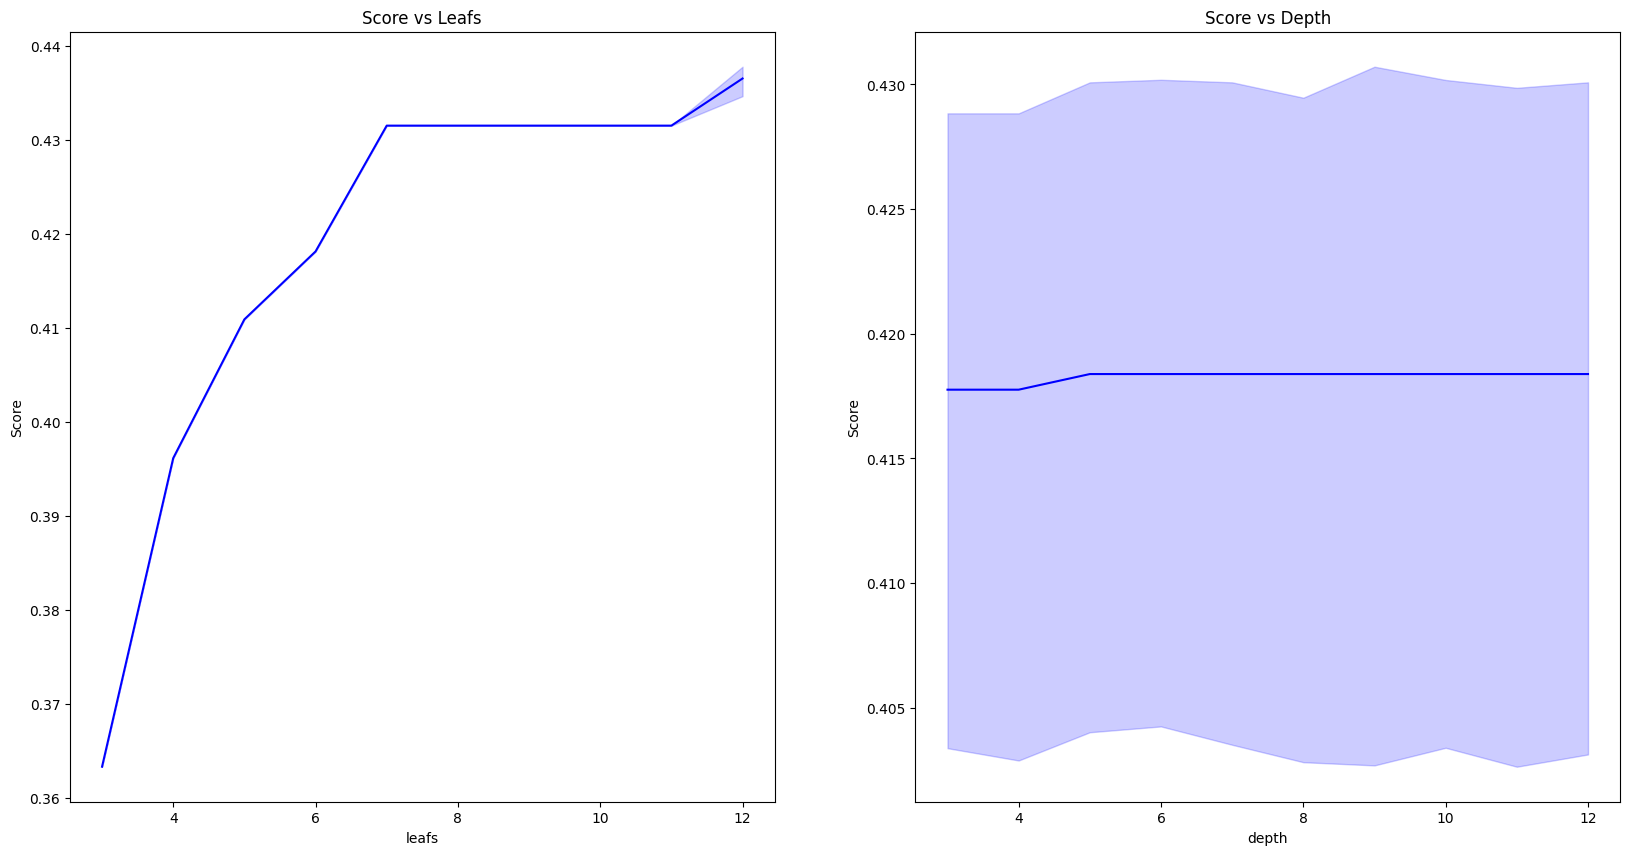

In [52]:
results = max_tree(1, X_c_train_scaled, y_train, X_c_test_scaled)

In [53]:
results[(results['Leafs'] == 7) & (results['Depth'] == 5)]

Score  Leafs  Depth
42  0.431516      7      5

In [54]:
clf = DecisionTreeClassifier(random_state=0, max_leaf_nodes=7, max_depth = 5, criterion='entropy')
clf.fit(X_c_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=7,
                       random_state=0)

In [55]:
y_pred = clf.predict(X_c_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.41393965150871226


Ahora, el árbol resultante es:

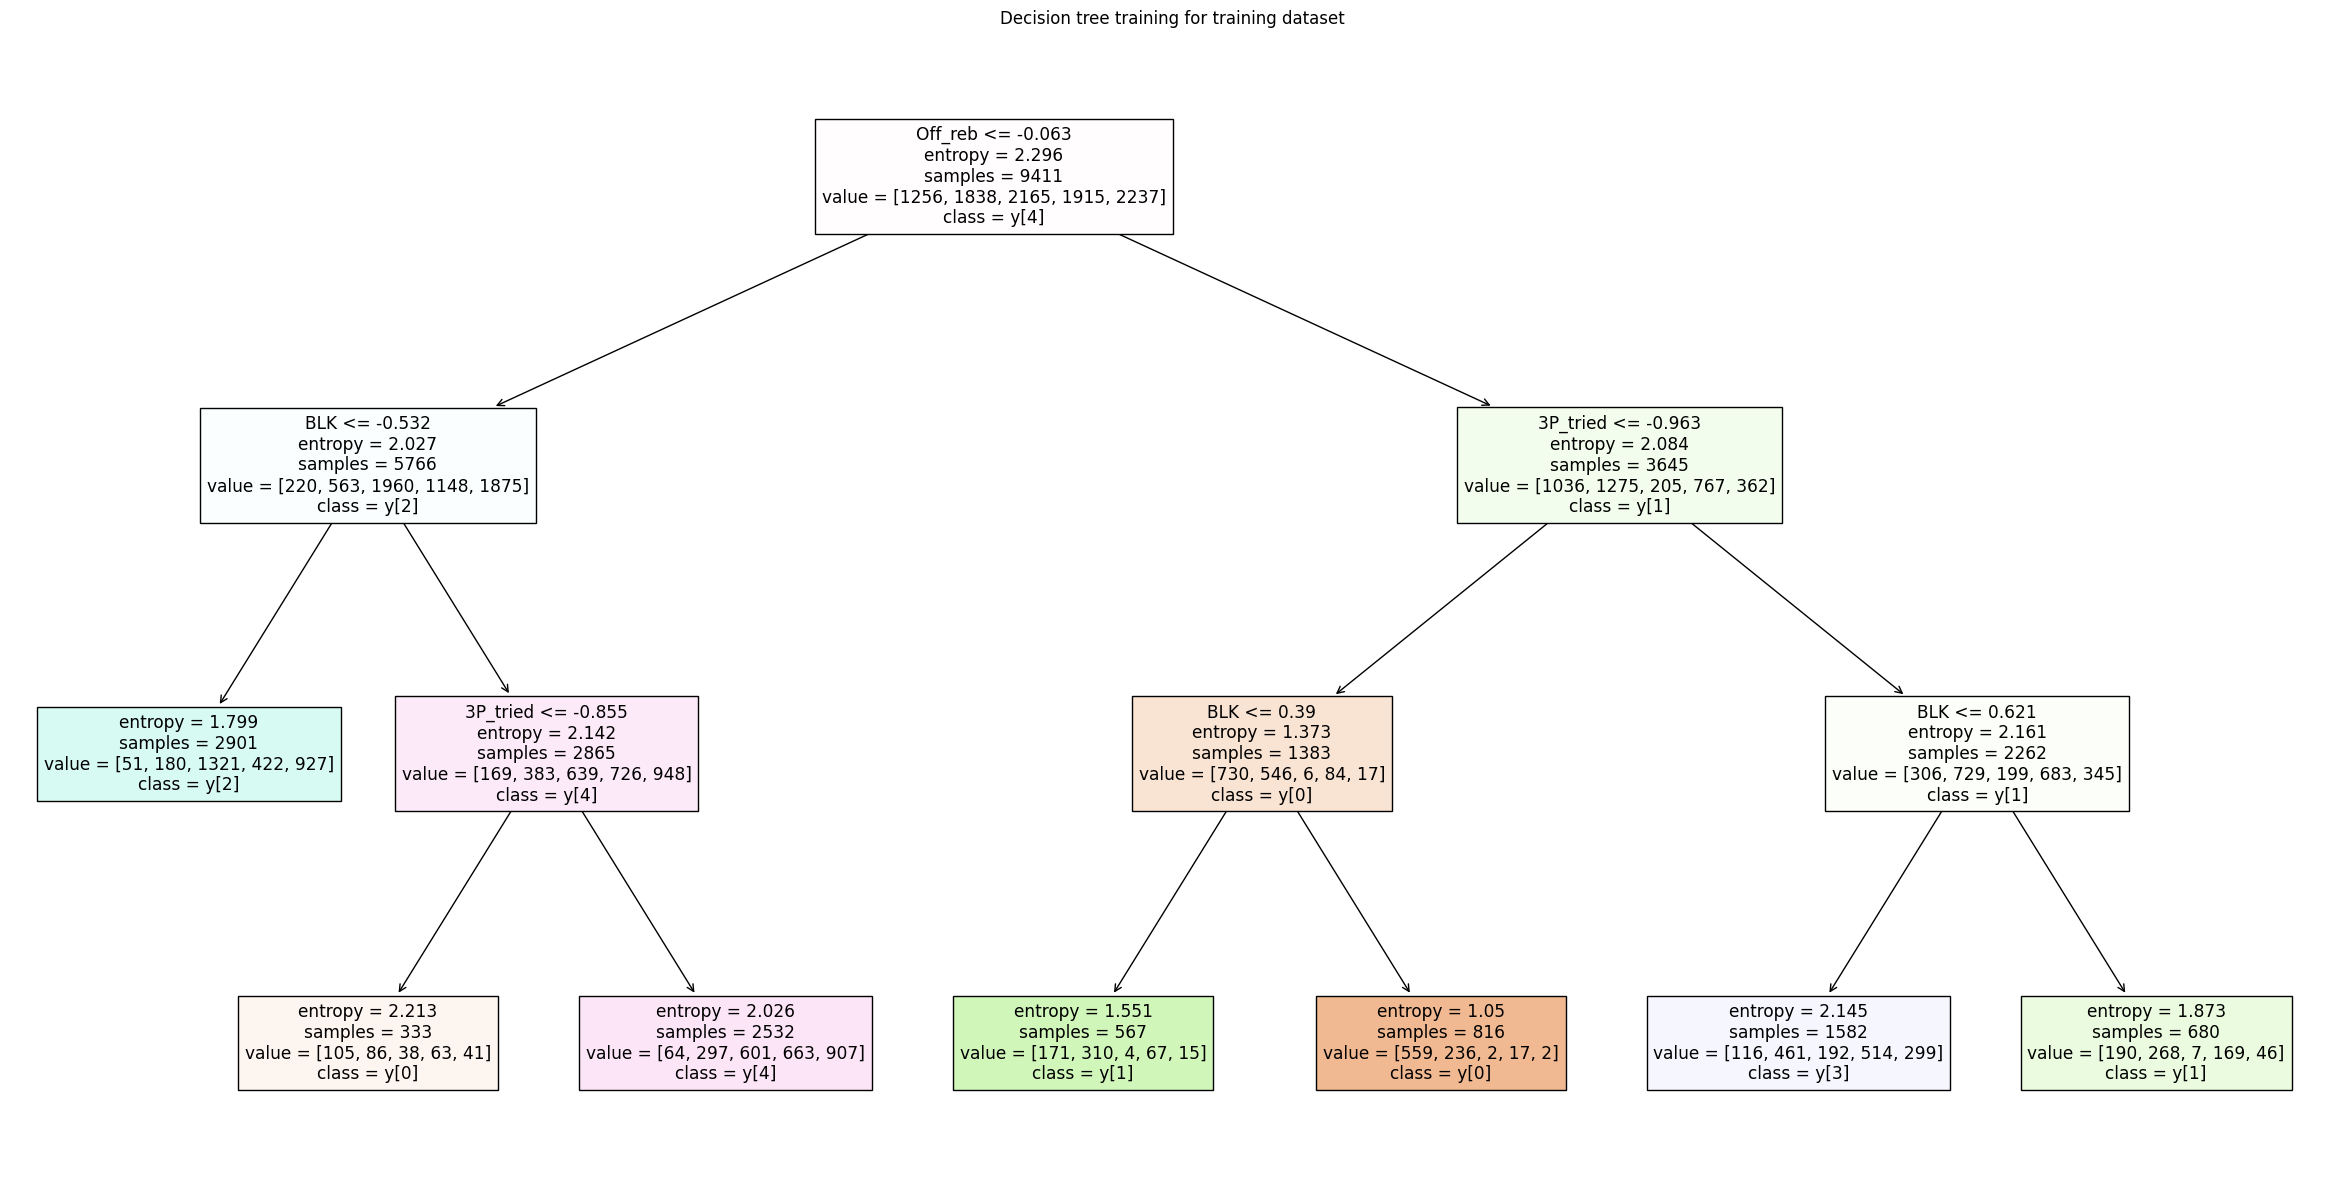

In [56]:
plt.figure(figsize=(30,15))
plot_tree(clf, filled=True, class_names=True, feature_names = column_names_c)
plt.title("Decision tree training for training dataset")
plt.show()

Sigue sin haber una mejora muy significativa respecto a los árboles previos. Los primeros nodos se mantienen casi idénticos y la entropía se mantiene bastante alta, indicando que no hay una clara clasificación. 

# Con información mutua

La información mutua es una medida de la dependencia estadística entre dos variables. En el contexto de la selección de características, la información mutua se puede emplear para determinar la relevancia o importancia de cada característica en relación con la variable objetivo en un problema de clasificación.

Cuanto mayor sea la información mutua, más información proporciona la característica sobre la variable objetivo.

Al seleccionar características con alta información mutua, se puede potencialmente mejorar el rendimiento del modelo de clasificación al enfocarse en los aspectos más relevantes de los datos. Este proceso de selección de características ayuda a reducir la dimensionalidad, eliminar características ruidosas o irrelevantes, y mejorar la capacidad del modelo para generalizar y realizar predicciones precisas.

In [57]:
discrete_features = X.dtypes == int

Se escalan las características

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['Rk', 'Age', 'Games_Played', 'Games_Starting', 'min_played', 'FG_made',
       'FG_tried', 'FG%', '3P_made', '3P_tried', '3P%', '2P_made', '2P_tried',
       '2P%', 'Effective_FG', 'FT_made', 'FT_tried', 'FT%', 'Off_reb',
       'Deff_reb', 'Tot_reb', 'AST', 'STL', 'BLK', 'Turn_ovs', 'Per_faults',
       'PTS']

Se definen los scores por cada una de las variables predictoras

In [59]:
#use mutual information classify to select mutual feature
def make_mi_scores(X_scaled, y, discrete_features):
    mi_scores = mutual_info_classif(X_scaled, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_scaled, y, discrete_features)
mi_scores  # show a few features with their MI scores

Off_reb           0.238991
BLK               0.208510
Tot_reb           0.172755
3P_tried          0.165687
Rk                0.158682
AST               0.140061
FG%               0.131064
3P_made           0.128375
Deff_reb          0.123918
3P%               0.108493
2P%               0.079475
Per_faults        0.057269
FT%               0.057243
Effective_FG      0.028202
STL               0.026985
Turn_ovs          0.024156
Games_Played      0.019992
Games_Starting    0.019854
2P_made           0.012857
FT_tried          0.006718
PTS               0.006396
Age               0.005903
2P_tried          0.005526
FG_made           0.005107
FT_made           0.000000
FG_tried          0.000000
min_played        0.000000
Name: MI Scores, dtype: float64

Note que las variables seleccionadas coinciden en su mayoría con aquellas que cuentan con la mayor correlación. 

Se ecogen las más influyentes

In [60]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.05]

X_im = drop_uninformative(X_scaled, mi_scores)


### Decision tree

Ahora, se define un árbol de clasificación haciendo uso de las variables con mayor relevancia tras emplear el método de información mutua. 

In [61]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_im,y)

predict = cross_val_predict(estimator = decision_tree, X = X_im, y = y, cv = 10)
print("Classification Report: \n",metrics.classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.52      0.52      1592
           1       0.42      0.42      0.42      2300
           2       0.72      0.70      0.71      2695
           3       0.38      0.38      0.38      2404
           4       0.47      0.48      0.47      2773

    accuracy                           0.50     11764
   macro avg       0.50      0.50      0.50     11764
weighted avg       0.51      0.50      0.51     11764



El accuracy del modelo es mejor que el de los primeros dos casos, pero sigue sin ser particularmente bueno, aunque ya alcanza un 50%. 

Ahora, si visualizamos las primeras 4 capas de este árbol de clasificación:

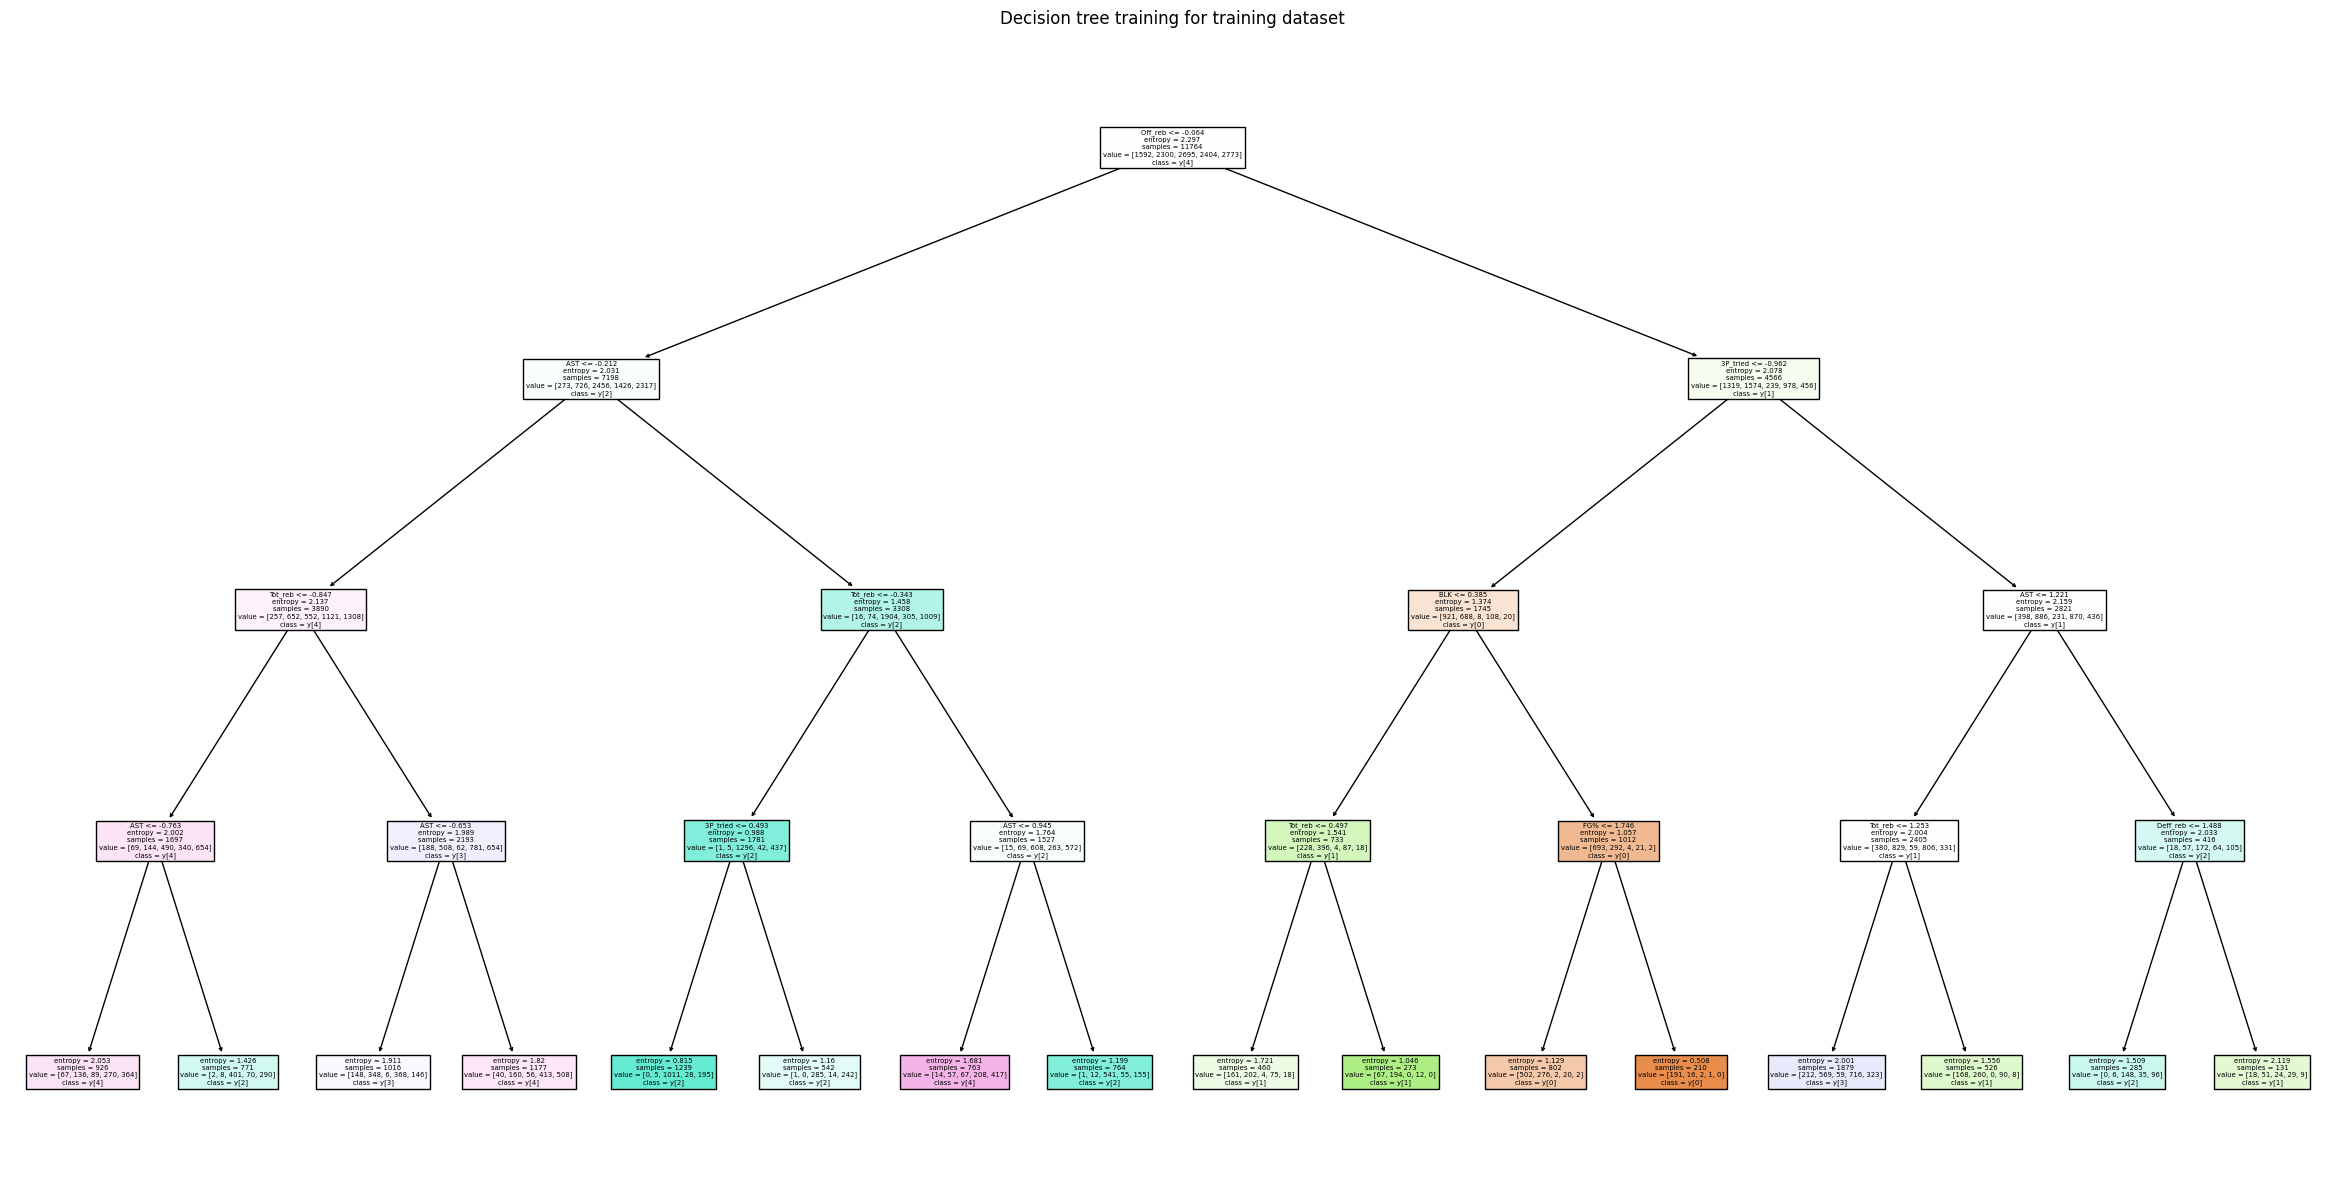

In [62]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth = 4,  criterion='entropy')
decision_tree.fit(X_im,y)

plt.figure(figsize=(30,15))
plot_tree(decision_tree, filled=True, class_names=True, feature_names = X_im.columns)
plt.title("Decision tree training for training dataset")
plt.show()

Vemos que en este caso, el primero nodo se mantiene idéntico a aquel de casos previos. La entropía llega a 1, que usualmente representa una "impureza" máxima. 

Ahora, evaluemos la entropía mínima a diferentes profundidades de este árbol de clasificación:

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Crear el clasificador de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Ajustar el clasificador a tus datos de entrenamiento (X_im e y)
decision_tree.fit(X_im, y)

# Obtener los nombres de las columnas originales
column_names = X_im.columns

# Diccionario para almacenar las tuplas (profundidad, entropía mínima, característica)
resultados = {}

# Evaluar el árbol en diferentes profundidades
for profundidad in range(1, 11):
    decision_tree = DecisionTreeClassifier(max_depth=profundidad)
    decision_tree.fit(X_im, y)
    arbol = decision_tree.tree_
    
    entropia_minima = float('inf')
    caracteristica_minima = None
    
    for nodo in range(arbol.node_count):
        if arbol.children_left[nodo] == arbol.children_right[nodo]:
            continue  # Ignorar nodos hoja
        
        entropia = arbol.impurity[nodo]
        if entropia < entropia_minima:
            entropia_minima = entropia
            indice_caracteristica = arbol.feature[nodo]
            nombre_caracteristica = column_names[indice_caracteristica]
            umbral = arbol.threshold[nodo]
            caracteristica_minima = (nombre_caracteristica, umbral)
    
    resultados[profundidad] = (entropia_minima, caracteristica_minima)

# Mostrar los resultados
print("Resultados:")
for profundidad, (entropia_minima, caracteristica_minima) in resultados.items():
    print("Profundidad:", profundidad)
    print("  - Entropía mínima:", entropia_minima)
    print("  - Característica mínima:", caracteristica_minima)


Resultados:
Profundidad: 1
  - Entropía mínima: 0.7936564488667008
  - Característica mínima: ('Off_reb', -0.0637821460259147)
Profundidad: 2
  - Entropía mínima: 0.7291028789834724
  - Característica mínima: ('AST', -0.1572386547923088)
Profundidad: 3
  - Entropía mínima: 0.5555404646487929
  - Característica mínima: ('3P_tried', 0.6548009812831879)
Profundidad: 4
  - Entropía mínima: 0.42710892095862385
  - Característica mínima: ('Tot_reb', -0.3427259474992752)
Profundidad: 5
  - Entropía mínima: 0.16684807256235823
  - Característica mínima: ('Tot_reb', -0.2797299399971962)
Profundidad: 6
  - Entropía mínima: 0.1368709101725164
  - Característica mínima: ('AST', 2.4882612228393555)
Profundidad: 7
  - Entropía mínima: 0.10640778091953063
  - Característica mínima: ('Per_faults', 2.1374412775039673)
Profundidad: 8
  - Entropía mínima: 0.07319234404536867
  - Característica mínima: ('Rk', 1.9295801520347595)
Profundidad: 9
  - Entropía mínima: 0.015150632247537987
  - Característica m

Vemos que a partir de la profundidad 5, hay nodos cuya entropía se acerca bastante a 0. Esto indica que el conjunto de datos está relativamente puro y bien separado en términos de clases, lo que facilita hacer predicciones precisas.

### Random forest classifier

Este algoritmo se basa en la construcción de múltiples árboles de decisión, donde cada árbol es entrenado con una muestra aleatoria y utiliza una selección aleatoria de características. Luego, combina las predicciones individuales de los árboles para obtener una predicción final. Esta técnica de “ensamble” permite que el modelo sea robusto frente a datos ruidosos y evita el sobre ajuste.

In [64]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X_im, y)
predict = cross_val_predict(estimator = random_forest, X = X_im, y = y, cv = 10)
print("Classification Report: \n",metrics.classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.58      0.61      1592
           1       0.51      0.48      0.50      2300
           2       0.80      0.82      0.81      2695
           3       0.46      0.49      0.48      2404
           4       0.56      0.59      0.57      2773

    accuracy                           0.60     11764
   macro avg       0.60      0.59      0.59     11764
weighted avg       0.60      0.60      0.60     11764



Vemos que en efecto el accuracy mejora de forma significativa. Este accuracy de 0.60 sugiere que el modelo tiene un desempeño moderado y puede beneficiarse de ajustes o mejoras para obtener resultados más precisos y confiables.

Este random forest tiene una mayor presición al momento de clasificar correctamente a los jugadores en la posición SG, ya que de los jugadores que eel modelo predijo que eran SG, el 80% lo eran verdaderamente. Además, de todos los jugadores que eran SG, el modelo predijo esta posición correctamente para el 82% de dichos jugadores. 

## Red Neuronal

Las variables con mayor correlación son 'Off_reb', 'Tot_reb', 'BLK', '3P_tried', 'Deff_reb' por lo que estas son las que utilizaremos para hacer el modelo que predice la posición. Vamos a seguir los mismos pasos de la red anterior.

In [65]:
Xnn = dfNN[['Off_reb', 'Tot_reb', 'BLK', '3P_tried', 'Deff_reb']]
ynn = dfNN[['Pos_C','Pos_PF','Pos_PG','Pos_SF','Pos_SG']]
Xnn_train, Xnn_test1, ynn_train, ynn_test1 = train_test_split(Xnn, ynn, train_size = 0.6, test_size = 0.4)
Xnn_val, Xnn_test, ynn_val, ynn_test = train_test_split(Xnn_test1, ynn_test1, train_size = 0.2, test_size = 0.2)

In [66]:
scaler = StandardScaler()
Xscaler = scaler.fit(Xnn_train)
Xtrain_scaled = Xscaler.transform(Xnn_train)
Xtest_scaled = Xscaler.transform(Xnn_test)
Xval_scaled = Xscaler.transform(Xnn_val)

Xtrain_scaled  = pd.DataFrame(Xtrain_scaled)
Xtest_scaled  = pd.DataFrame(Xtest_scaled)
Xval_scaled  = pd.DataFrame(Xval_scaled)

In [67]:
train_sec=MyDataset(Xtrain_scaled, ynn_train)
test_sec=MyDataset(Xtest_scaled, ynn_test)
val_sec=MyDataset(Xval_scaled, ynn_val)

In [68]:
train_data=DataLoader(
    train_sec,
    batch_size=5,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

test_data=DataLoader(
    test_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

val_data=DataLoader(
    val_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

In [69]:
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5,5)
        

    def forward(self, x):   
    	# Do the forward pass
        x = F.sigmoid(self.fc1(x))
        return x

In [70]:
model = Net()
optimizer= torch.optim.SGD(model.parameters(),lr= 0.1)
criterion= nn.CrossEntropyLoss()
model.to(device)

Net(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
)

In [71]:
train_model(model,optimizer,criterion,train_data,val_data,10)

Epoch: 0 	Training Loss: 1.458691 	Validation Loss: 0.005004
Validation loss decreased (inf --> 0.005004).  Saving model ...
Epoch: 1 	Training Loss: 1.419256 	Validation Loss: 0.004726
Validation loss decreased (0.005004 --> 0.004726).  Saving model ...
Epoch: 2 	Training Loss: 1.410962 	Validation Loss: 0.004559
Validation loss decreased (0.004726 --> 0.004559).  Saving model ...
Epoch: 3 	Training Loss: 1.406644 	Validation Loss: 0.004450
Validation loss decreased (0.004559 --> 0.004450).  Saving model ...
Epoch: 4 	Training Loss: 1.403846 	Validation Loss: 0.004373
Validation loss decreased (0.004450 --> 0.004373).  Saving model ...
Epoch: 5 	Training Loss: 1.401830 	Validation Loss: 0.004316
Validation loss decreased (0.004373 --> 0.004316).  Saving model ...
Epoch: 6 	Training Loss: 1.400283 	Validation Loss: 0.004271
Validation loss decreased (0.004316 --> 0.004271).  Saving model ...
Epoch: 7 	Training Loss: 1.399048 	Validation Loss: 0.004235
Validation loss decreased (0.00427

In [72]:
accuracy=0.0

for data, target in test_data:
    data=data.to(device)
    target=target.to(device)
    output=model(data).detach().numpy()
    target = np.nanargmax(target.detach().numpy(), axis=1)
    output = np.nanargmax(output, axis = 1)
    a = accuracy_score(target,output)
    accuracy += a.item()*data.size(0)
accuracy = accuracy/len(test_data.dataset)
print('Accuracy: {:.6f}\n'.format(accuracy))

Accuracy: 0.386412



Un resultado sorprendente es que, utilizando las variables de mayor correlación, la red neuronal tiene 20% menos exactitud que cuando utilizamos todas las variables. Esto se puede deber a que estamos utilizando que 5 variables para clasificar en 5 categorías lo que solo nos permite utilizar una capa y una función de transformación, luego el modelo no logra un entrenamiento muy bueno. Por lo tanto, se podría decir que para menos variables las redes neuronales no tiene mucha precisión.

# 2 categorías

Es posible que debido a la cantidad de categorías, los árboles de clasificación no estén haciendo una buena labor, a pesar de que si resultan en clasificaciones mejores a que si se hiciera de forma arbitraria. Es por esto, que se opta por dividir las 5 posiciones en dos categorías: Exterior e Interior. 

In [73]:
df2['Pos'] = df2['Pos'].replace('PG','EXTR')
df2['Pos'] = df2['Pos'].replace('SG','EXTR')
df2['Pos'] = df2['Pos'].replace('SF','INTR')
df2['Pos'] = df2['Pos'].replace('C','INTR')
df2['Pos'] = df2['Pos'].replace('PF','INTR')

In [74]:
df2['Pos'] = df2['Pos'].astype('category').cat.codes

In [75]:
X_2 = df2.drop(columns=["Pos", "Player", "Team", "Year"], axis = 1)
y_2 = df2["Pos"]

Nuevamente, se escalan las variables

In [76]:
scaler = StandardScaler()
X_2scaled = scaler.fit_transform(X_2)
X_2scaled = pd.DataFrame(X_2scaled)
X_2scaled.columns = ['Rk', 'Age', 'Games_Played', 'Games_Starting', 'min_played', 'FG_made',
       'FG_tried', 'FG%', '3P_made', '3P_tried', '3P%', '2P_made', '2P_tried',
       '2P%', 'Effective_FG', 'FT_made', 'FT_tried', 'FT%', 'Off_reb',
       'Deff_reb', 'Tot_reb', 'AST', 'STL', 'BLK', 'Turn_ovs', 'Per_faults',
       'PTS']

Y se separan en conjuntos de entrenamiento y prueba:

In [77]:

X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)

## Con información mutua

Dado que este método resultó en los mejores resultados cuando se consideraban las 5 posiciones, se hará uso de la información mutua para el caso binario. 

In [78]:
discrete_features = X_2scaled.dtypes == int
mi_scores2 = make_mi_scores(X_2scaled, y_2, discrete_features)
mi_scores2

Off_reb           0.170610
BLK               0.137159
Tot_reb           0.132842
AST               0.085812
Deff_reb          0.085570
FG%               0.078479
3P_tried          0.076312
3P_made           0.059170
3P%               0.048339
FT%               0.044537
2P%               0.042068
Per_faults        0.039431
Effective_FG      0.028949
STL               0.017152
Rk                0.016409
Games_Played      0.008539
Turn_ovs          0.006536
FT_made           0.005870
Age               0.005387
2P_made           0.005298
Games_Starting    0.003532
2P_tried          0.003187
FT_tried          0.000000
FG_tried          0.000000
FG_made           0.000000
min_played        0.000000
PTS               0.000000
Name: MI Scores, dtype: float64

In [79]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.05]

X_2scaled = drop_uninformative(X_2scaled, mi_scores2)

### Decision Tree

Ahora se construye un árbol de clasificación utilizando las variables más influyentes según la información mutua en la categorización de los jugadores como Exteriores o Interiores.

In [80]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_2scaled,y_2)

predict = cross_val_predict(estimator = decision_tree, X = X_2scaled, y = y_2, cv = 10)
print("Classification Report: \n",metrics.classification_report(y_2, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      5468
           1       0.83      0.83      0.83      6296

    accuracy                           0.82     11764
   macro avg       0.82      0.82      0.82     11764
weighted avg       0.82      0.82      0.82     11764



Vemos que al reducir el problema de clasificación a 2 posiciones, los modelos son mucho más precisos. 

Este árbol de clasificación tiene una accuracy del 81%. Además, los f1-scores de ambas categorías, al ser cercano a 1, muestra que el modelo hace una buena labor de predicción de la posición de los jugadores. De los jugadores que el modelo predijo que serían Exteriores, el 80% lo eran, mientras que para los Interiores esto se cumple con el 83%

Ahora, visualizando el árbol para una profundida máxima de 4 niveles.

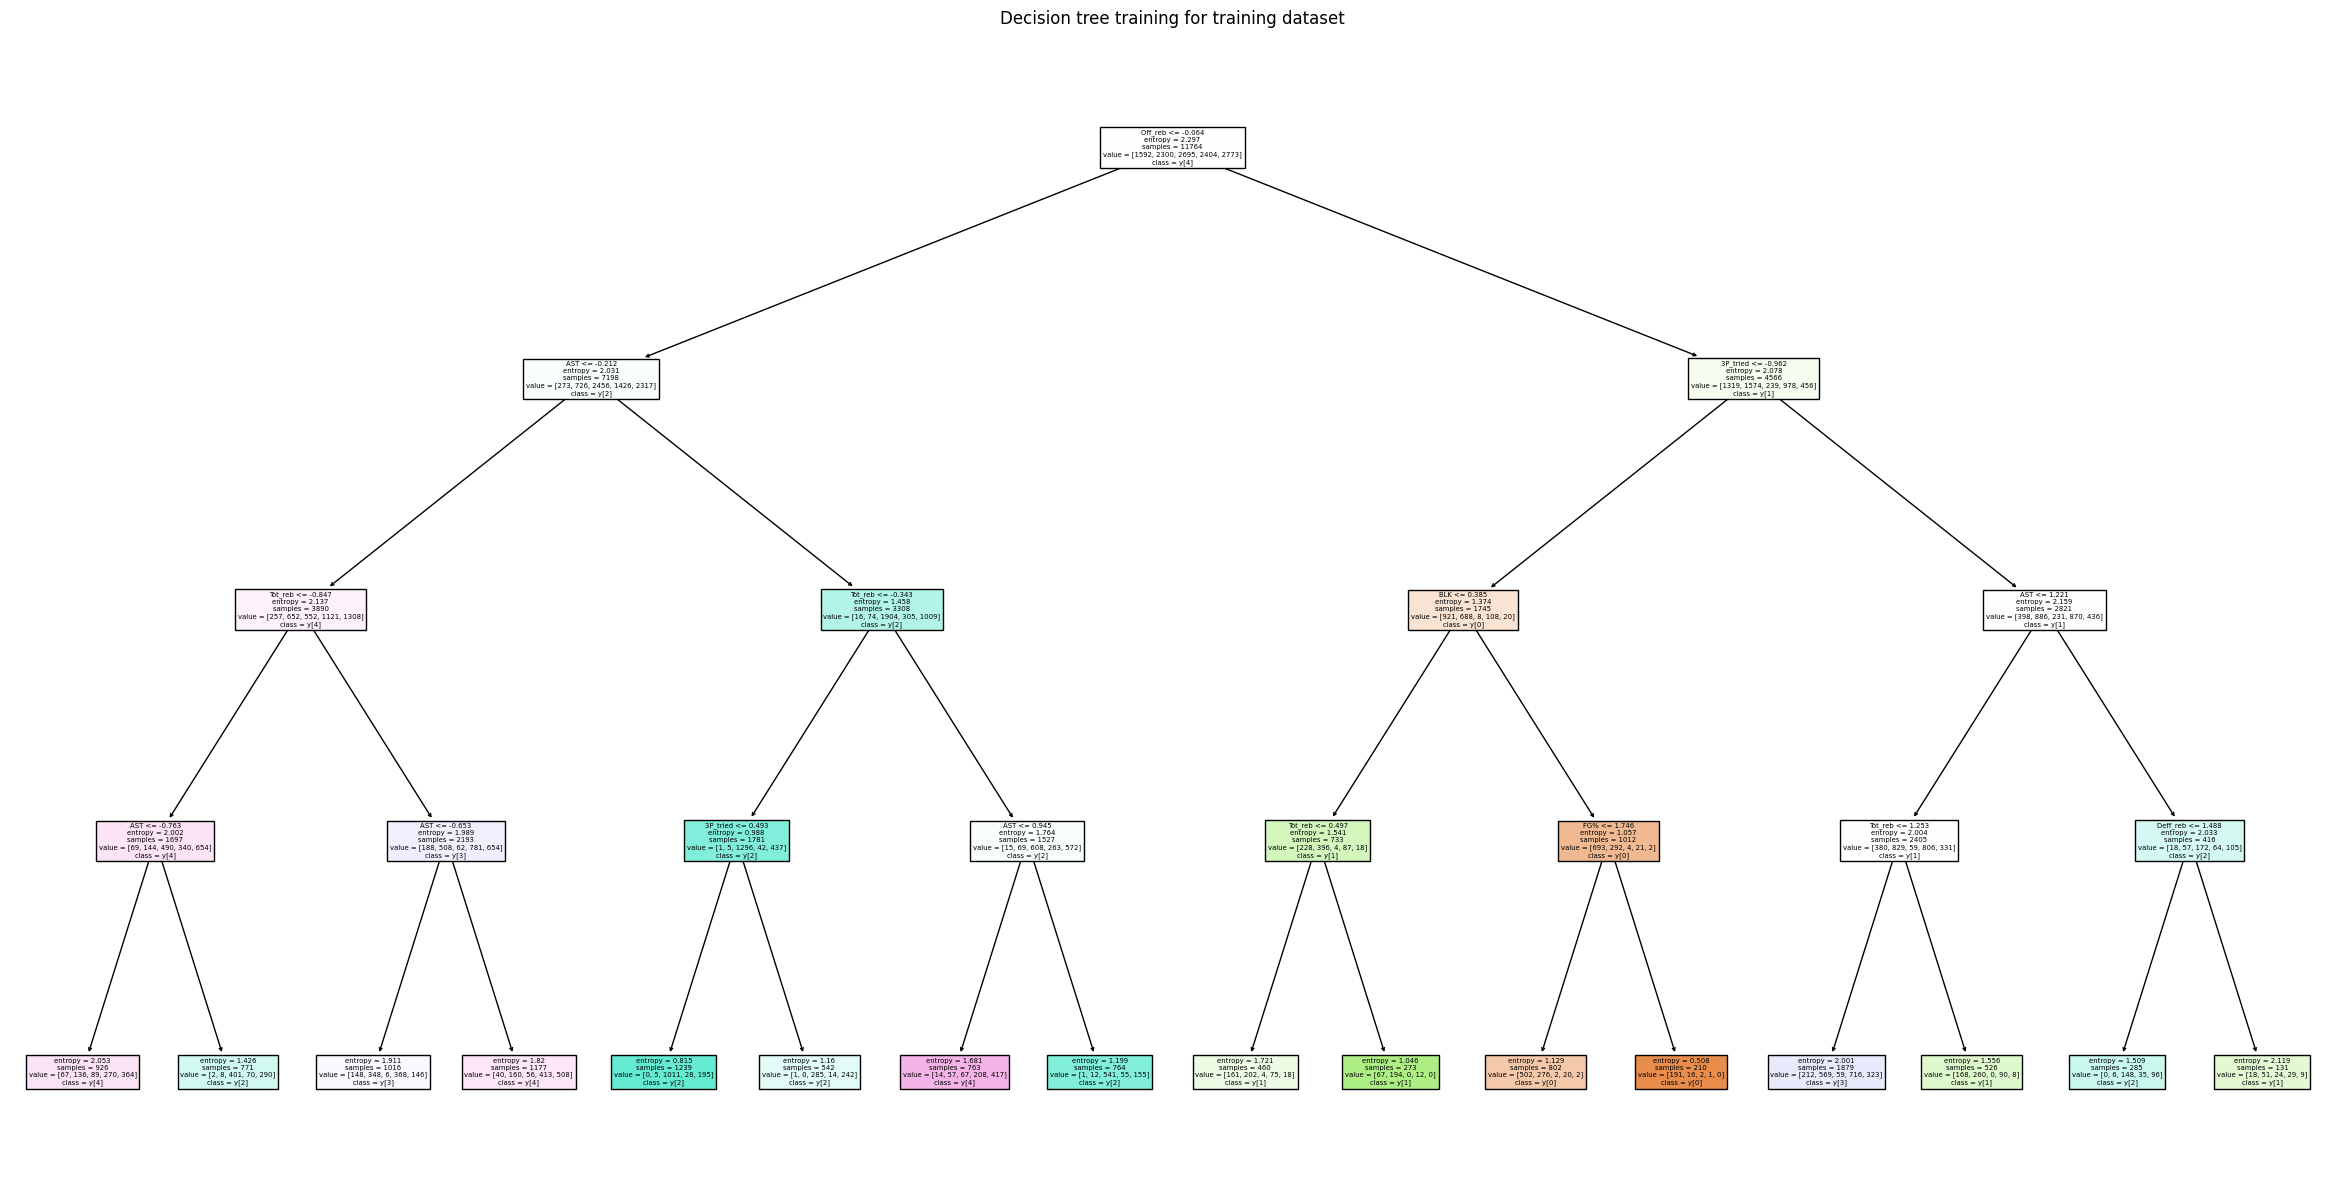

In [81]:
decision_t = DecisionTreeClassifier(random_state=0, max_depth = 4,  criterion='entropy')
decision_t.fit(X_2scaled,y)

plt.figure(figsize=(30,15))
plot_tree(decision_t, filled=True, class_names=True, feature_names = X_2scaled.columns)
plt.title("Decision tree training for training dataset")
plt.show()

A pesar de que el árbol comienza con una entropía de 2.3, a medida que el árbol se va desplegando, la entropía se reduce significativamente, llegando a entropías de cerca de 0.5, lo cual  implica una distribución relativamente equilibrada o incierta de las etiquetas de clase dentro de ese nodo, lo que requiere divisiones adicionales para lograr una mejor separación de clases.

In [82]:
# Crear el clasificador de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Ajustar el clasificador a tus datos de entrenamiento (X_2scaled e y)
decision_tree.fit(X_2scaled, y)

# Obtener los nombres de las columnas originales
column_names = X_2scaled.columns

# Diccionario para almacenar las tuplas (profundidad, entropía mínima, característica)
resultados = {}

# Evaluar el árbol en diferentes profundidades
for profundidad in range(1, 11):
    decision_tree = DecisionTreeClassifier(max_depth=profundidad)
    decision_tree.fit(X_2scaled, y)
    arbol = decision_tree.tree_
    
    entropia_minima = float('inf')
    caracteristica_minima = None
    
    for nodo in range(arbol.node_count):
        if arbol.children_left[nodo] == arbol.children_right[nodo]:
            continue  # Ignorar nodos hoja
        
        entropia = arbol.impurity[nodo]
        if entropia < entropia_minima:
            entropia_minima = entropia
            indice_caracteristica = arbol.feature[nodo]
            nombre_caracteristica = column_names[indice_caracteristica]
            umbral = arbol.threshold[nodo]
            caracteristica_minima = (nombre_caracteristica, umbral)
    
    resultados[profundidad] = (entropia_minima, caracteristica_minima)

# Mostrar los resultados
print("Resultados:")
for profundidad, (entropia_minima, caracteristica_minima) in resultados.items():
    print("Profundidad:", profundidad)
    print("  - Entropía mínima:", entropia_minima)
    print("  - Característica mínima:", caracteristica_minima)


Resultados:
Profundidad: 1
  - Entropía mínima: 0.7936564488667008
  - Característica mínima: ('Off_reb', -0.0637821460259147)
Profundidad: 2
  - Entropía mínima: 0.7291028789834724
  - Característica mínima: ('AST', -0.1572386547923088)
Profundidad: 3
  - Entropía mínima: 0.5555404646487929
  - Característica mínima: ('3P_tried', 0.6548009812831879)
Profundidad: 4
  - Entropía mínima: 0.42710892095862385
  - Característica mínima: ('Tot_reb', -0.3427259474992752)
Profundidad: 5
  - Entropía mínima: 0.16684807256235823
  - Característica mínima: ('Tot_reb', -0.2797299399971962)
Profundidad: 6
  - Entropía mínima: 0.1368709101725164
  - Característica mínima: ('AST', 2.4882612228393555)
Profundidad: 7
  - Entropía mínima: 0.03939999999999999
  - Característica mínima: ('Deff_reb', -0.44278526306152344)
Profundidad: 8
  - Entropía mínima: 0.019997959391898745
  - Característica mínima: ('Off_reb', 1.0893937945365906)
Profundidad: 9
  - Entropía mínima: 0.015150632247537987
  - Caracterís

Vemos que a partir de la profundidad 5 la entropía mínima es significativamente menor y a partir de la profundidad 8 es la variable Off_reb aquella que resulta ser fundamental a la hora de clasificar los datos. 

### Random forest classifier

In [83]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X_2scaled, y_2)
predict = cross_val_predict(estimator = random_forest, X = X_2scaled, y = y_2, cv = 10)
print("Classification Report: \n",metrics.classification_report(y_2, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      5468
           1       0.87      0.87      0.87      6296

    accuracy                           0.86     11764
   macro avg       0.86      0.86      0.86     11764
weighted avg       0.86      0.86      0.86     11764



Incluso mejor que el árbol de clasificación, el random forest classifier tiene una accuracy del 86%. La presición de sus clasificaciones es mayor al 86% y su recall para ambas categorías es superior a 0.85. Esto, para 5468 jugadores exteriores y 6296 interiores. 

### SVM

En la evaluación utilizando todas las variables, el modelo basado en SVM demostró tener la mayor precisión en general. Por lo tanto, ahora que se están considerando solo dos categorías y al observar la mejora significativa que han mostrado los árboles de decisión en este escenario, se espera que el modelo SVM para las dos posiciones sea uno de los mejores para predecir la posición de un jugador.

In [84]:
clf_svm = SVC()
clf_svm.fit(X2_train, y2_train)

y_pred = clf_svm.predict(X2_test)

report = metrics.classification_report(y2_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1066
           1       0.75      0.81      0.78      1287

    accuracy                           0.75      2353
   macro avg       0.75      0.74      0.75      2353
weighted avg       0.75      0.75      0.75      2353



En términos generales, el modelo tiene un rendimiento razonablemente bueno con una precisión y un F1-score similares para ambas clases. Sin embargo, el recall para la clase Exterior es un poco más bajo en comparación con la clase Interior. No obstante, la mejoría no es tan significativa como se esperaba, más aún considerando como se comportaron los árboles de desición tras convertir el problema de clasificación a un ode únicamente 2 clases.

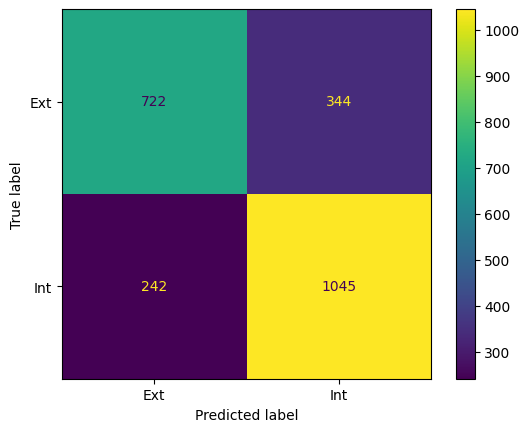

In [85]:
plot_confusion_matrix(clf_svm, 
                      X2_test, 
                      y2_test, 
                     display_labels=['Ext','Int'])

En este caso se definieron 722 verdaderos Exteriores, 1045 verdaderos Interiores, 242 falsos Exteriores y 344 falsos Interiores.

## Red Neuronal

In [86]:
dfNN=pd.read_csv('NBA_Player_Stats_new.csv').dropna()
posit = ['PG','SG','SF','C','PF']
dfNN = dfNN[dfNN['Pos'].isin(posit)]

In [87]:
dfNN['Pos'] = dfNN['Pos'].replace('PG','EXTR')
dfNN['Pos'] = dfNN['Pos'].replace('SG','EXTR')
dfNN['Pos'] = dfNN['Pos'].replace('SF','INTR')
dfNN['Pos'] = dfNN['Pos'].replace('C','INTR')
dfNN['Pos'] = dfNN['Pos'].replace('PF','INTR')
dfNN = pd.get_dummies(dfNN,columns=['Pos'])

In [88]:
Xnn = dfNN.drop(columns=['Pos_EXTR','Pos_INTR', "Player", "Team", "Year"], axis = 1)
ynn = dfNN[['Pos_EXTR','Pos_INTR']]
Xnn_train, X_test1, ynn_train, y_test1 = train_test_split(Xnn, ynn, train_size = 0.6, test_size = 0.4)
Xnn_val, Xnn_test, ynn_val, ynn_test = train_test_split(X_test1, y_test1, train_size = 0.2, test_size = 0.2)

In [89]:
scaler = StandardScaler()
Xscaler = scaler.fit(Xnn_train)
Xtrain_scaled = Xscaler.transform(Xnn_train)
Xtest_scaled = Xscaler.transform(Xnn_test)
Xval_scaled = Xscaler.transform(Xnn_val)

Xtrain_scaled  = pd.DataFrame(Xtrain_scaled)
Xtest_scaled  = pd.DataFrame(Xtest_scaled)
Xval_scaled  = pd.DataFrame(Xval_scaled)

In [90]:
train_sec=MyDataset(Xtrain_scaled, ynn_train)
test_sec=MyDataset(Xtest_scaled, ynn_test)
val_sec=MyDataset(Xval_scaled, ynn_val)

In [91]:
train_data=DataLoader(
    train_sec,
    batch_size=5,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

test_data=DataLoader(
    test_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

val_data=DataLoader(
    val_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

In [92]:
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(27,17)
        self.fc2 = nn.Linear(17,10)
        self.fc3 = nn.Linear(10,8)
        self.fc4 = nn.Linear(8,2)
        

    def forward(self, x):   
    	# Do the forward pass
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

In [93]:
model = Net()
optimizer= torch.optim.SGD(model.parameters(),lr= 0.1)
criterion= nn.CrossEntropyLoss()
model.to(device)

Net(
  (fc1): Linear(in_features=27, out_features=17, bias=True)
  (fc2): Linear(in_features=17, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=2, bias=True)
)

In [94]:
train_model(model,optimizer,criterion,train_data,val_data,10)

Epoch: 0 	Training Loss: 0.698560 	Validation Loss: 0.001892
Validation loss decreased (inf --> 0.001892).  Saving model ...
Epoch: 1 	Training Loss: 0.550911 	Validation Loss: 0.000258
Validation loss decreased (0.001892 --> 0.000258).  Saving model ...
Epoch: 2 	Training Loss: 0.317440 	Validation Loss: 0.000221
Validation loss decreased (0.000258 --> 0.000221).  Saving model ...
Epoch: 3 	Training Loss: 0.308846 	Validation Loss: 0.000204
Validation loss decreased (0.000221 --> 0.000204).  Saving model ...
Epoch: 4 	Training Loss: 0.302658 	Validation Loss: 0.000179
Validation loss decreased (0.000204 --> 0.000179).  Saving model ...
Epoch: 5 	Training Loss: 0.297252 	Validation Loss: 0.000154
Validation loss decreased (0.000179 --> 0.000154).  Saving model ...
Epoch: 6 	Training Loss: 0.292455 	Validation Loss: 0.000135
Validation loss decreased (0.000154 --> 0.000135).  Saving model ...
Epoch: 7 	Training Loss: 0.288159 	Validation Loss: 0.000119
Validation loss decreased (0.00013

In [95]:
model.load_state_dict(torch.load('NBA.pt'))

<All keys matched successfully>

In [96]:
accuracy=0.0

for data, target in test_data:
    data=data.to(device)
    target=target.to(device)
    output=model(data).detach().numpy()
    target = np.nanargmax(target.detach().numpy(), axis=1)
    output = np.nanargmax(output, axis = 1)
    a = accuracy_score(target,output)
    accuracy += a.item()*data.size(0)
accuracy = accuracy/len(test_data.dataset)
print('Accuracy: {:.6f}\n'.format(accuracy))

Accuracy: 0.867304



En este último modelo podemos ver que tenemos una train loss data media vs una accuracy alta. Esta es la accuracy más alta de todos los modelos con redes neuronales. Estos resultados se pudieron deber a que con la reducción de variables categóricas, es cómo haber definido una subcapa con únicamente estas variables llendo a exterior o interior. Esto reduce el Test loss y validation loss pero también igualándolos por falta de variabilidad, lo que hace un mejor modelo.

# Conclusiones

En conclusión, el proyecto de machine learning para la clasificación de la posición de jugadores de baloncesto ha demostrado que es posible obtener resultados prometedores utilizando técnicas de aprendizaje supervisado.

Inicialmente, se exploraron diferentes algoritmos de clasificación, como árboles de decisión, Random Forest, redes neuronales y Support Vector Machines. Tras evaluar todos los modelos con todas las variables disponibles, se encontró que el modelo basado en Support Vector Machines (SVM) obtuvo el mejor rendimiento, con una precisión (accuracy) de clasificación del 65%. Esto indica que el SVM fue capaz de clasificar correctamente la posición de los jugadores en aproximadamente dos tercios de los casos.

Posteriormente, se llevaron a cabo análisis más detallados utilizando características específicas de los jugadores. Se observó que al utilizar solo las variables con mayor correlación, no se obtuvieron mejoras significativas en el rendimiento del modelo. Sin embargo, al aplicar el criterio de información mutua para seleccionar las variables más relevantes, se logró mejorar el rendimiento del modelo Random Forest, que alcanzó una precisión del 60%. Esto sugiere que la información mutua fue capaz de identificar características relevantes para la clasificación de posiciones de jugadores de baloncesto.

En una etapa posterior, se decidió simplificar el problema de clasificación reduciendo las clases a solo dos posiciones. En este caso, se evaluó un modelo de Random Forest utilizando el criterio de información mutua y se obtuvo una precisión destacada del 86%. Esto indica que, al reducir la complejidad del problema, el modelo fue capaz de clasificar de manera más precisa los jugadores en las dos posiciones definidas.

En resumen, el proyecto demuestra que es posible utilizar técnicas de machine learning para clasificar la posición de los jugadores de baloncesto con un nivel aceptable de precisión. Además, se destaca la importancia de la selección de características relevantes y la simplificación del problema para mejorar el rendimiento de los modelos de clasificación.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6042dac0-9746-4523-95ac-59942726109b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>